In [82]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
df

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

In [3]:
df.shape

(158, 12)

In [4]:
# this data set has 158 rows and 12 column out of those 12 columns 
# happiness score is my label and remaining columns are my features 
# the data set contains data about country's happiness score and factors affecting this score
# country and region column contains object data 
# happiness rank column contains integer data
# remaining columns contains float data
# as my label column has continuous data and data set has more than one features I term it as Multiple Linear Regression problem.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
# here i observed there are 158 non-null values in each column and .shape shows 158 rows in data set it means there are no null values are present in any of the columns

In [7]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [8]:
#country and Region columns have object data i will have to convert it to numerical data through encoding

In [9]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [10]:
# here i observed region column has 10 unique values out of 158 total value count it means region column has categorical data
# all the other columns has higher count of unique values so i can Confirm all the other columns has continuous data

In [11]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [12]:
# None of the column has any null value 
# so far data looks pretty decent 

In [13]:
df.head(15)

Country                           Region  Happiness Rank  \
0     Switzerland                   Western Europe               1   
1         Iceland                   Western Europe               2   
2         Denmark                   Western Europe               3   
3          Norway                   Western Europe               4   
4          Canada                    North America               5   
5         Finland                   Western Europe               6   
6     Netherlands                   Western Europe               7   
7          Sweden                   Western Europe               8   
8     New Zealand        Australia and New Zealand               9   
9       Australia        Australia and New Zealand              10   
10         Israel  Middle East and Northern Africa              11   
11     Costa Rica      Latin America and Caribbean              12   
12        Austria                   Western Europe              13   
13         Mexico      Latin America and Caribbean              14   
14  United States                    North America              15   

    Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0             7.587         0.03411                   1.39651  1.34951   
1             7.561         0.04884                   1.30232  1.40223   
2             7.527         0.03328                   1.32548  1.36058   
3             7.522         0.03880                   1.45900  1.33095   
4             7.427         0.03553                   1.32629  1.32261   
5             7.406         0.03140                   1.29025  1.31826   
6             7.378         0.02799                   1.32944  1.28017   
7             7.364         0.03157                   1.33171  1.28907   
8             7.286         0.03371                   1.25018  1.31967   
9             7.284         0.04083                   1.33358  1.30923   
10            7.278         0.03470                   1.22857  1.22393   
11            7.226         0.04454                   0.95578  1.23788   
12            7.200         0.03751                   1.33723  1.29704   
13            7.187         0.04176                   1.02054  0.91451   
14            7.119         0.03839                   1.39451  1.24711   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                    0.94143  0.66557                        0.41978   
1                    0.94784  0.62877                        0.14145   
2                    0.87464  0.64938                        0.48357   
3                    0.88521  0.66973                        0.36503   
4                    0.90563  0.63297                        0.32957   
5                    0.88911  0.64169                        0.41372   
6                    0.89284  0.61576                        0.31814   
7                    0.91087  0.65980                        0.43844   
8                    0.90837  0.63938                        0.42922   
9                    0.93156  0.65124                        0.35637   
10                   0.91387  0.41319                        0.07785   
11                   0.86027  0.63376                        0.10583   
12                   0.89042  0.62433                        0.18676   
13                   0.81444  0.48181                        0.21312   
14                   0.86179  0.54604                        0.15890   

    Generosity  Dystopia Residual  
0      0.29678            2.51738  
1      0.43630            2.70201  
2      0.34139            2.49204  
3      0.34699            2.46531  
4      0.45811            2.45176  
5      0.23351            2.61955  
6      0.47610            2.46570  
7      0.36262            2.37119  
8      0.47501            2.26425  
9      0.43562            2.26646  
10     0.33172            3.08854  
11     0.25497            3.17728  
12     0.33088            2.53320  
13     0.14074            3.60214  
14     0.40

In [14]:
df.tail(15)

Country                           Region  \
143                     Niger               Sub-Saharan Africa   
144                  Cambodia                Southeastern Asia   
145                  Tanzania               Sub-Saharan Africa   
146                Madagascar               Sub-Saharan Africa   
147  Central African Republic               Sub-Saharan Africa   
148                      Chad               Sub-Saharan Africa   
149                    Guinea               Sub-Saharan Africa   
150               Ivory Coast               Sub-Saharan Africa   
151              Burkina Faso               Sub-Saharan Africa   
152               Afghanistan                    Southern Asia   
153                    Rwanda               Sub-Saharan Africa   
154                     Benin               Sub-Saharan Africa   
155                     Syria  Middle East and Northern Africa   
156                   Burundi               Sub-Saharan Africa   
157                      Togo               Sub-Saharan Africa   

     Happiness Rank  Happiness Score  Standard Error  \
143             144            3.845         0.03602   
144             145            3.819         0.05069   
145             146            3.781         0.05061   
146             147            3.681         0.03633   
147             148            3.678         0.06112   
148             149            3.667         0.03830   
149             150            3.656         0.03590   
150             151            3.655         0.05141   
151             152            3.587         0.04324   
152             153            3.575         0.03084   
153             154            3.465         0.03464   
154             155            3.340         0.03656   
155             156            3.006         0.05015   
156             157            2.905         0.08658   
157             158            2.839         0.06727   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
143                   0.06940  0.77265                   0.29707  0.47692   
144                   0.46038  0.62736                   0.61114  0.66246   
145                   0.28520  1.00268                   0.38215  0.32878   
146                   0.20824  0.66801                   0.46721  0.19184   
147                   0.07850  0.00000                   0.06699  0.48879   
148                   0.34193  0.76062                   0.15010  0.23501   
149                   0.17417  0.46475                   0.24009  0.37725   
150                   0.46534  0.77115                   0.15185  0.46866   
151                   0.25812  0.85188                   0.27125  0.39493   
152                   0.31982  0.30285                   0.30335  0.23414   
153                   0.22208  0.77370                   0.42864  0.59201   
154                   0.28665  0.35386                   0.31910  0.48450   
155                   0.66320  0.47489                   0.72193  0.15684   
156                   0.01530  0.41587                   0.22396  0.11850   
157                   0.20868  0.13995                   0.28443  0.36453   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
143                        0.15639     0.19387            1.87877  
144                        0.07247     0.40359            0.98195  
145                        0.05747     0.34377            1.38079  
146                        0.08124     0.21333            1.85100  
147                        0.08289     0.23835            2.72230  
148                        0.05269     0.18386            1.94296  
149                        0.12139     0.28657            1.99172  
150                        0.17922     0.20165            1.41723  
151                        0.12832     0.21747            1.46494  
152                        0.09719     0.36510            1.95210  
153                        0.55191     0.22628            0.67042  
154                

In [15]:
df.sample(30)

Country                           Region  Happiness Rank  \
72        Estonia       Central and Eastern Europe              73   
28         France                   Western Europe              29   
113         Ghana               Sub-Saharan Africa             114   
93     Mozambique               Sub-Saharan Africa              94   
16     Luxembourg                   Western Europe              17   
117         Sudan               Sub-Saharan Africa             118   
23      Singapore                Southeastern Asia              24   
43     Uzbekistan       Central and Eastern Europe              44   
11     Costa Rica      Latin America and Caribbean              12   
121      Ethiopia               Sub-Saharan Africa             122   
76     Kyrgyzstan       Central and Eastern Europe              77   
54       Slovenia       Central and Eastern Europe              55   
74        Vietnam                Southeastern Asia              75   
154         Benin               Sub-Saharan Africa             155   
116         India                    Southern Asia             117   
122  Sierra Leone               Sub-Saharan Africa             123   
98           Laos                Southeastern Asia              99   
102       Lebanon  Middle East and Northern Africa             103   
18        Belgium                   Western Europe              19   
68         Kosovo       Central and Eastern Europe              69   
91        Morocco  Middle East and Northern Africa              92   
133      Bulgaria       Central and Eastern Europe             134   
75         Turkey  Middle East and Northern Africa              76   
50        Bolivia      Latin America and Caribbean              51   
153        Rwanda               Sub-Saharan Africa             154   
56      Nicaragua      Latin America and Caribbean              57   
53     Kazakhstan       Central and Eastern Europe              54   
129       Georgia       Central and Eastern Europe             130   
46    South Korea                     Eastern Asia              47   
52       Paraguay      Latin America and Caribbean              53   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
72             5.429         0.04013                   1.15174  1.22791   
28             6.575         0.03512                   1.27778  1.26038   
113            4.633         0.04742                   0.54558  0.67954   
93             4.971         0.07896                   0.08308  1.02626   
16             6.946         0.03499                   1.56391  1.21963   
117            4.550         0.06740                   0.52107  1.01404   
23             6.798         0.03780                   1.52186  1.02000   
43             6.003         0.04361                   0.63244  1.34043   
11             7.226         0.04454                   0.95578  1.23788   
121            4.512         0.03780                   0.19073  0.60406   
76             5.286         0.03823                   0.47428  1.15115   
54             5.848         0.04251                   1.18498  1.27385   
74             5.360         0.03107                   0.63216  0.91226   
154            3.340         0.03656                   0.28665  0.35386   
116            4.565         0.02043                   0.64499  0.38174   
122            4.507         0.07068                   0.33024  0.95571   
98             4.876         0.06698                   0.59066  0.73803   
102            4.839         0.04337                   1.02564  0.80001   
18             6.937         0.03595                   1.30782  1.28566   
68             5.589         0.05018                   0.80148  0.81198   
91             5.013         0.03420                   0.73479  0.64095   
133            4.218         0.04828                   1.01216  1.10614   
75             5.332         0.03864                   1.06098  0.94632   
50             5.890         0.05642   

In [16]:
# after looking at all the above .head,.tail.,.sample data frames of our data set i observed their are no null values present in the data set
# country and region column contains object data 
# happiness rank column contains integer data
# remaining columns contains float data

<Axes: >

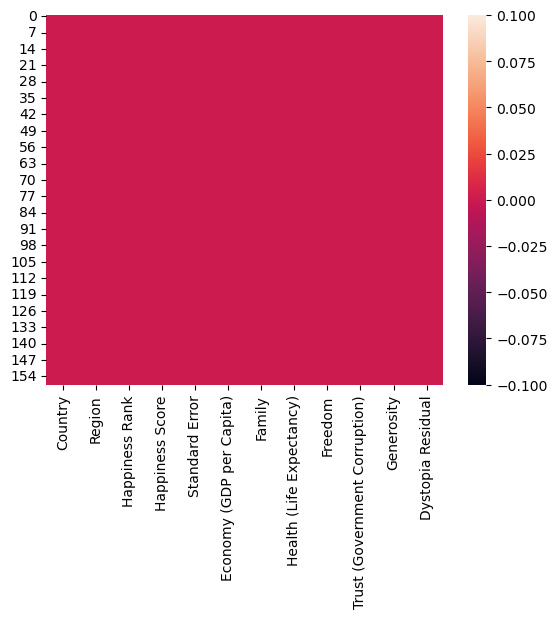

In [17]:
sns.heatmap(df.isnull())

In [18]:
# let's check value count for each column
columns = 0  
while columns < 12:
    column_name = df.columns[columns]
    print(f"Value counts for {column_name}:")
    print(df[column_name].value_counts())
    print('\n')
    columns += 1


Value counts for Country:
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Value counts for Region:
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


Value counts for Happiness Rank:
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


Value counts for Happiness Score:
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833 

In [19]:
# here i observed region column has 10 categories 

In [20]:
column_names = df.columns
column_names

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [21]:
df.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

In [22]:
# here i can observe that count is also reflecting 158 number of data for each column so i feel there is no NAN value present

# to get insight for data distribution mean and std value plays important roll. 

# here i can observe all the column has lesser std values in comparison to their respective mean values.

# even though i feel this differce is not significant enough to consider the data to be Normally distributed.

# by Comparing mean and median values of the columns i observed that their is really little difference between mean and median of of all the columns.

# Happiness Score, Standard Error,Trust (Government Corruption),Generosity,Dystopia Residual these columns has Slightly higher mean value than their respective median value. with this i suspect there can be Slightly  right skewness present in these columns

# remaining columns like happiness rank,economy,family,health,freedom, these columns has slightly higher median values than their respective mean values, hence i suspect their can be Slightly left skewness present in these columns

# but i feel that these skewness will be Between acceptable range as the difference between values is very little.

# also i observed there is significant differences between min and q1 of family, health, freedom columns hence i suspect the Presence of down side Outliers in these columns.

# i observed there is significant differences between q3 and max values of economy,trust, generosity columns hence i suspect the Presence of up side Outliers in these columns.



In [23]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [24]:
# here i observed Standard Error,family, health,trust,Generosity all these columns has Skewness  Beyond acceptable range(-0.5to+0.5).
# Lets remove skewness from above mentioned columns
df1 = df.copy()
column_to_transform = ['Standard Error','Family','Health (Life Expectancy)','Trust (Government Corruption)','Generosity']
from scipy.stats import boxcox

for column in column_to_transform:
    df1[column], _ = boxcox(df1[column] + 1)
    
df1.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.317575
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.413462
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual               -0.238911
dtype: float64

In [25]:
# Let's convert country and Region Column's object data type to numerical data type through LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['Country_Encoded'] = le.fit_transform(df['Country'])
df1['Region_Encoded'] = le.fit_transform(df['Region'])
df1 = df1.drop(columns=['Country','Region'])
df1

Happiness Rank  Happiness Score  Standard Error  \
0                 1            7.587        0.021419   
1                 2            7.561        0.025790   
2                 3            7.527        0.021113   
3                 4            7.522        0.023018   
4                 5            7.427        0.021926   
..              ...              ...             ...   
153             154            3.465        0.021611   
154             155            3.340        0.022281   
155             156            3.006        0.026096   
156             157            2.905        0.031307   
157             158            2.839        0.029204   

     Economy (GDP per Capita)    Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  5.691972                  2.179346  0.66557   
1                     1.30232  6.186694                  2.204887  0.62877   
2                     1.32548  5.793505                  1.923489  0.64938   
3                     1.45900  5.524497                  1.962746  0.66973   
4                     1.32629  5.450357                  2.039891  0.63297   
..                        ...       ...                       ...      ...   
153                   0.22208  1.899117                  0.649256  0.59201   
154                   0.28665  0.547704                  0.437142  0.48450   
155                   0.66320  0.844861                  1.405981  0.15684   
156                   0.01530  0.691739                  0.280306  0.11850   
157                   0.20868  0.167201                  0.377155  0.36453   

     Trust (Government Corruption)  Generosity  Dystopia Residual  \
0                         0.153413    0.198464            2.51738   
1                         0.093425    0.250490            2.70201   
2                         0.158877    0.216981            2.49204   
3                         0.147242    0.219169            2.46531   
4                         0.142283    0.257230            2.45176   
..                             ...         ...                ...   
153                       0.163241    0.164709            0.67042   
154                       0.062574    0.140503            1.63328   
155                       0.110826    0.261297            0.32858   
156                       0.074172    0.148946            1.83302   
157                       0.077654    0.131036            1.56726   

     Country_Encoded  Region_Encoded  
0                135               9  
1                 58               9  
2                 37               9  
3                105               9  
4                 24               5  
..               ...             ...  
153              118               8  
154               13               8  
155              136               4  
156               21               8  
157              141               8  

[158 rows x 12 columns]

## Let's visualise the data distribution through graphs 

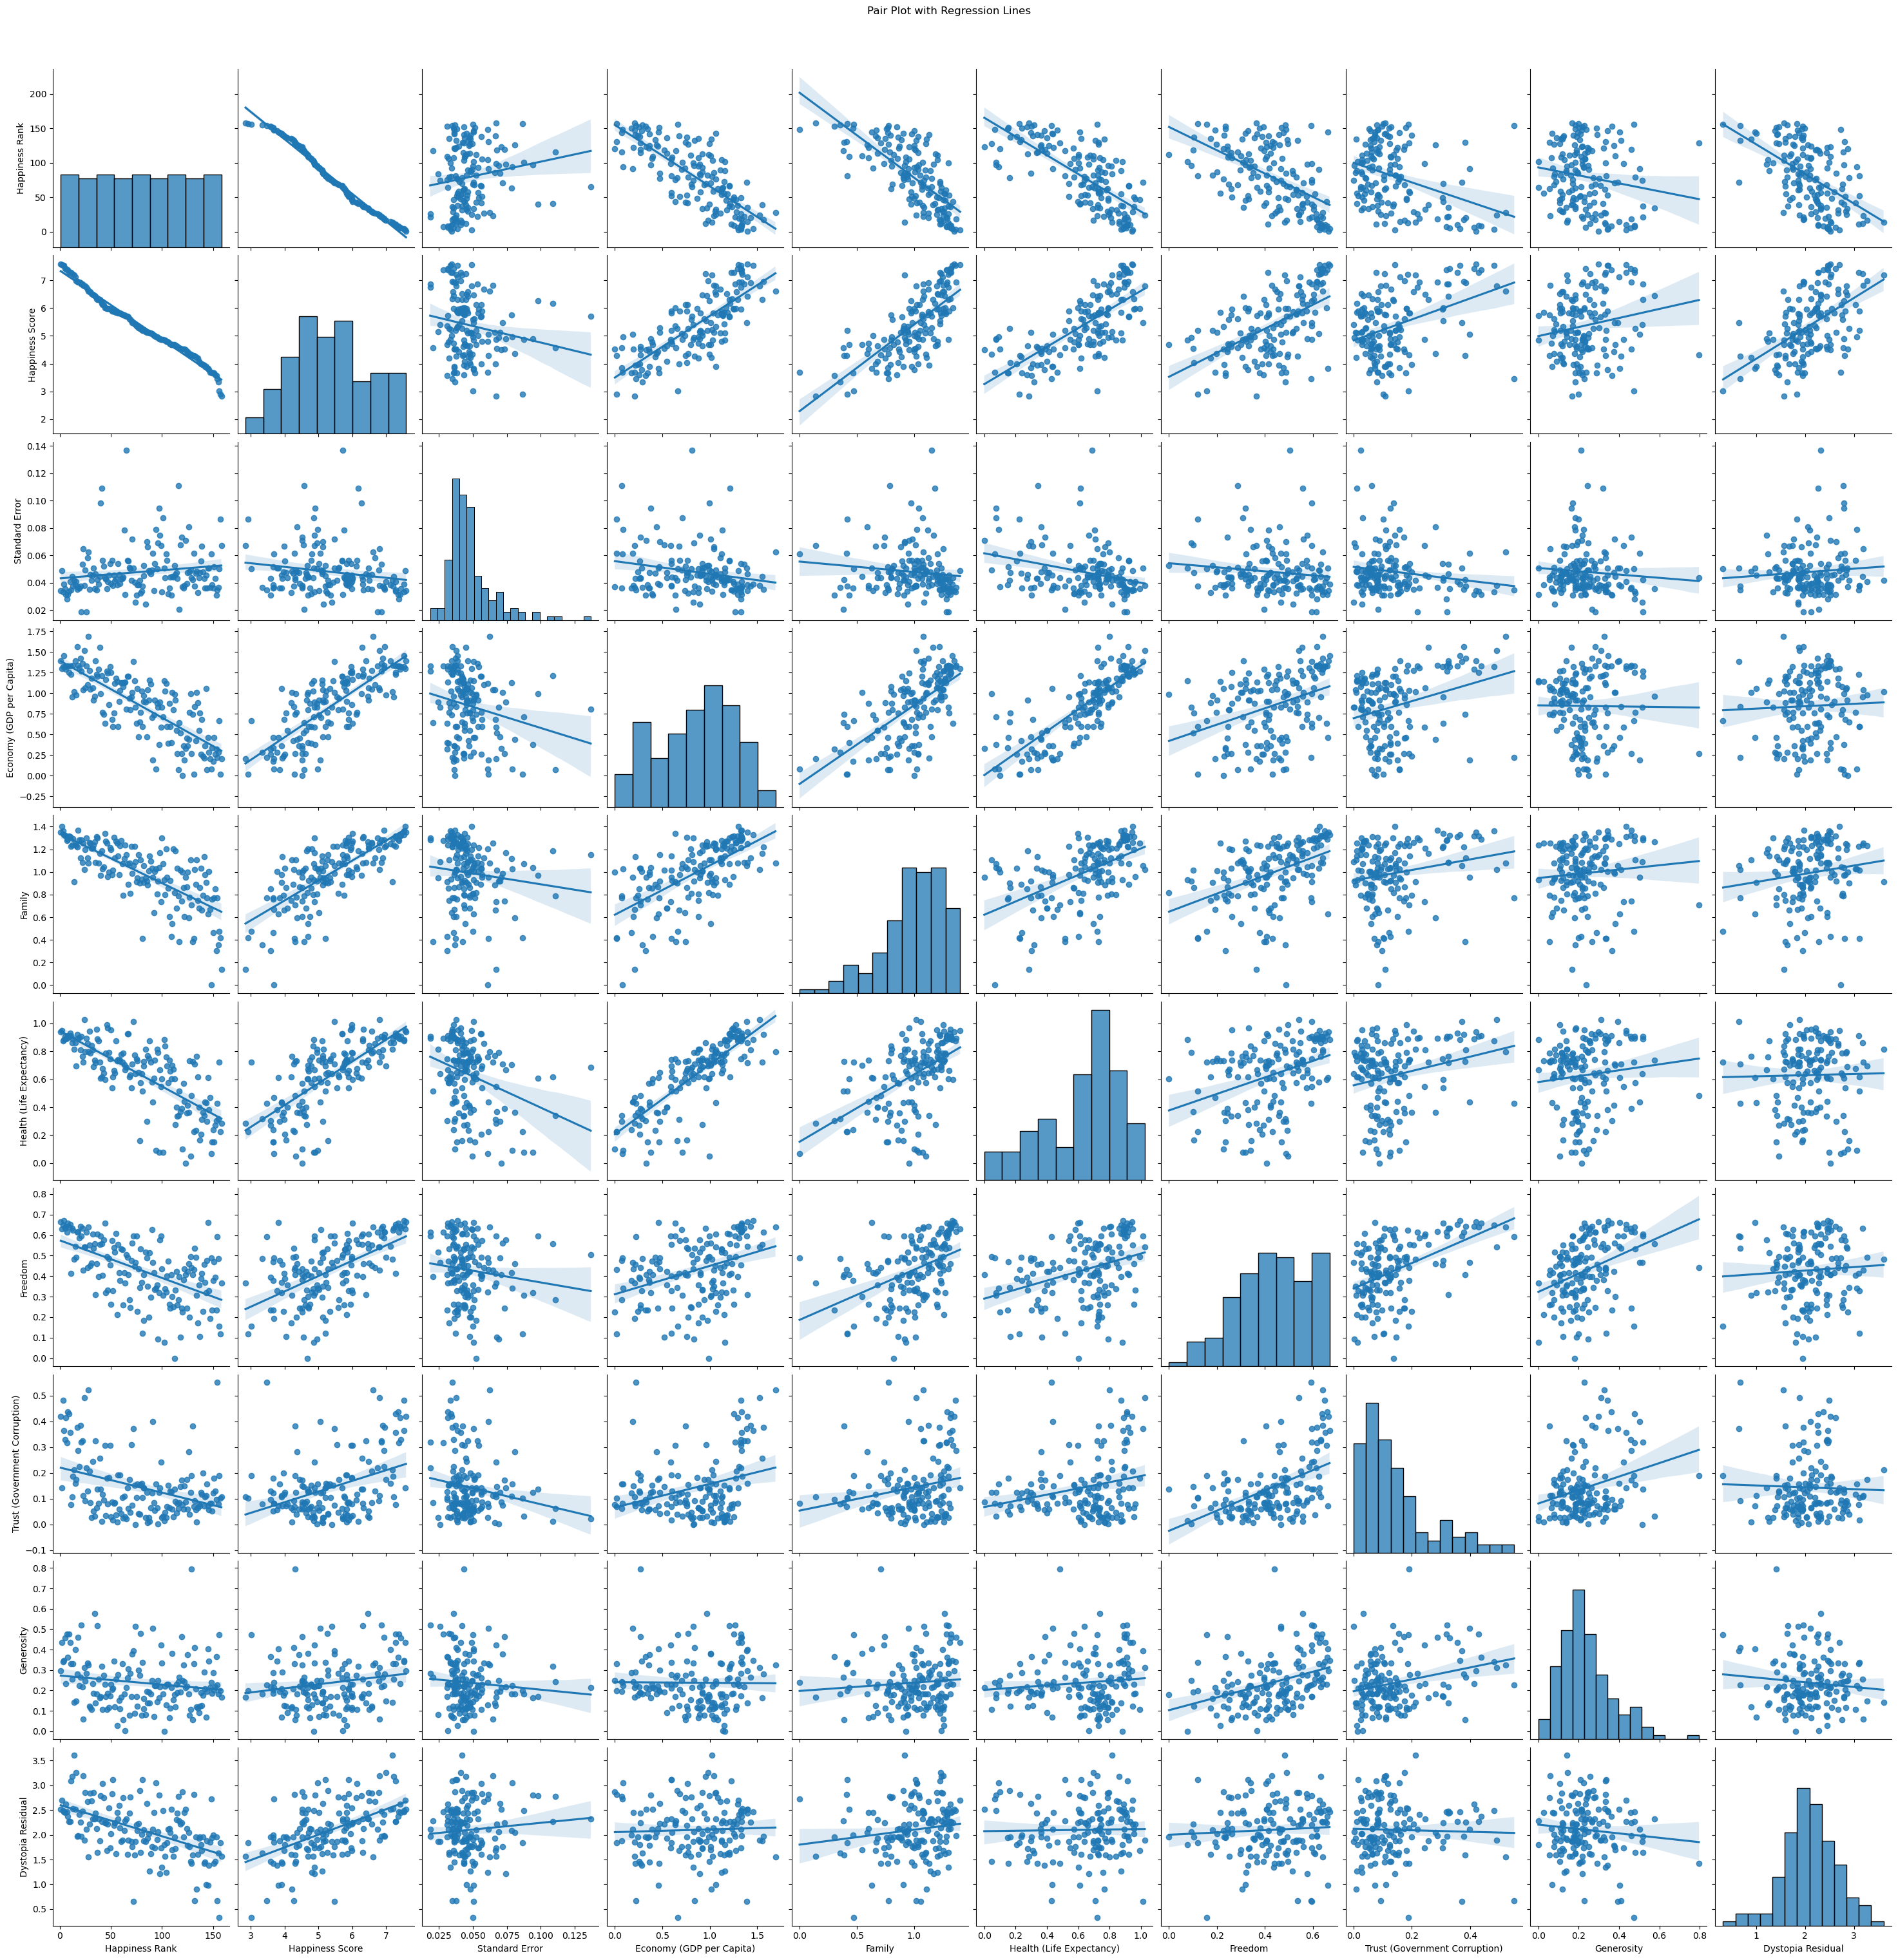

In [26]:

# Create a pair plot
sns.pairplot(df[column_names], kind='reg',height=3)
plt.suptitle('Pair Plot with Regression Lines', y=1.02)
plt.show()


In [27]:
# from above graph i observed all the feathers have Little or more correlation with label
# standars,trust error column has right skewness 
# Family column has little left skewness 
# but the relationship between columns Seems positive but it doesnt seems strong as the data looks very much scattered  

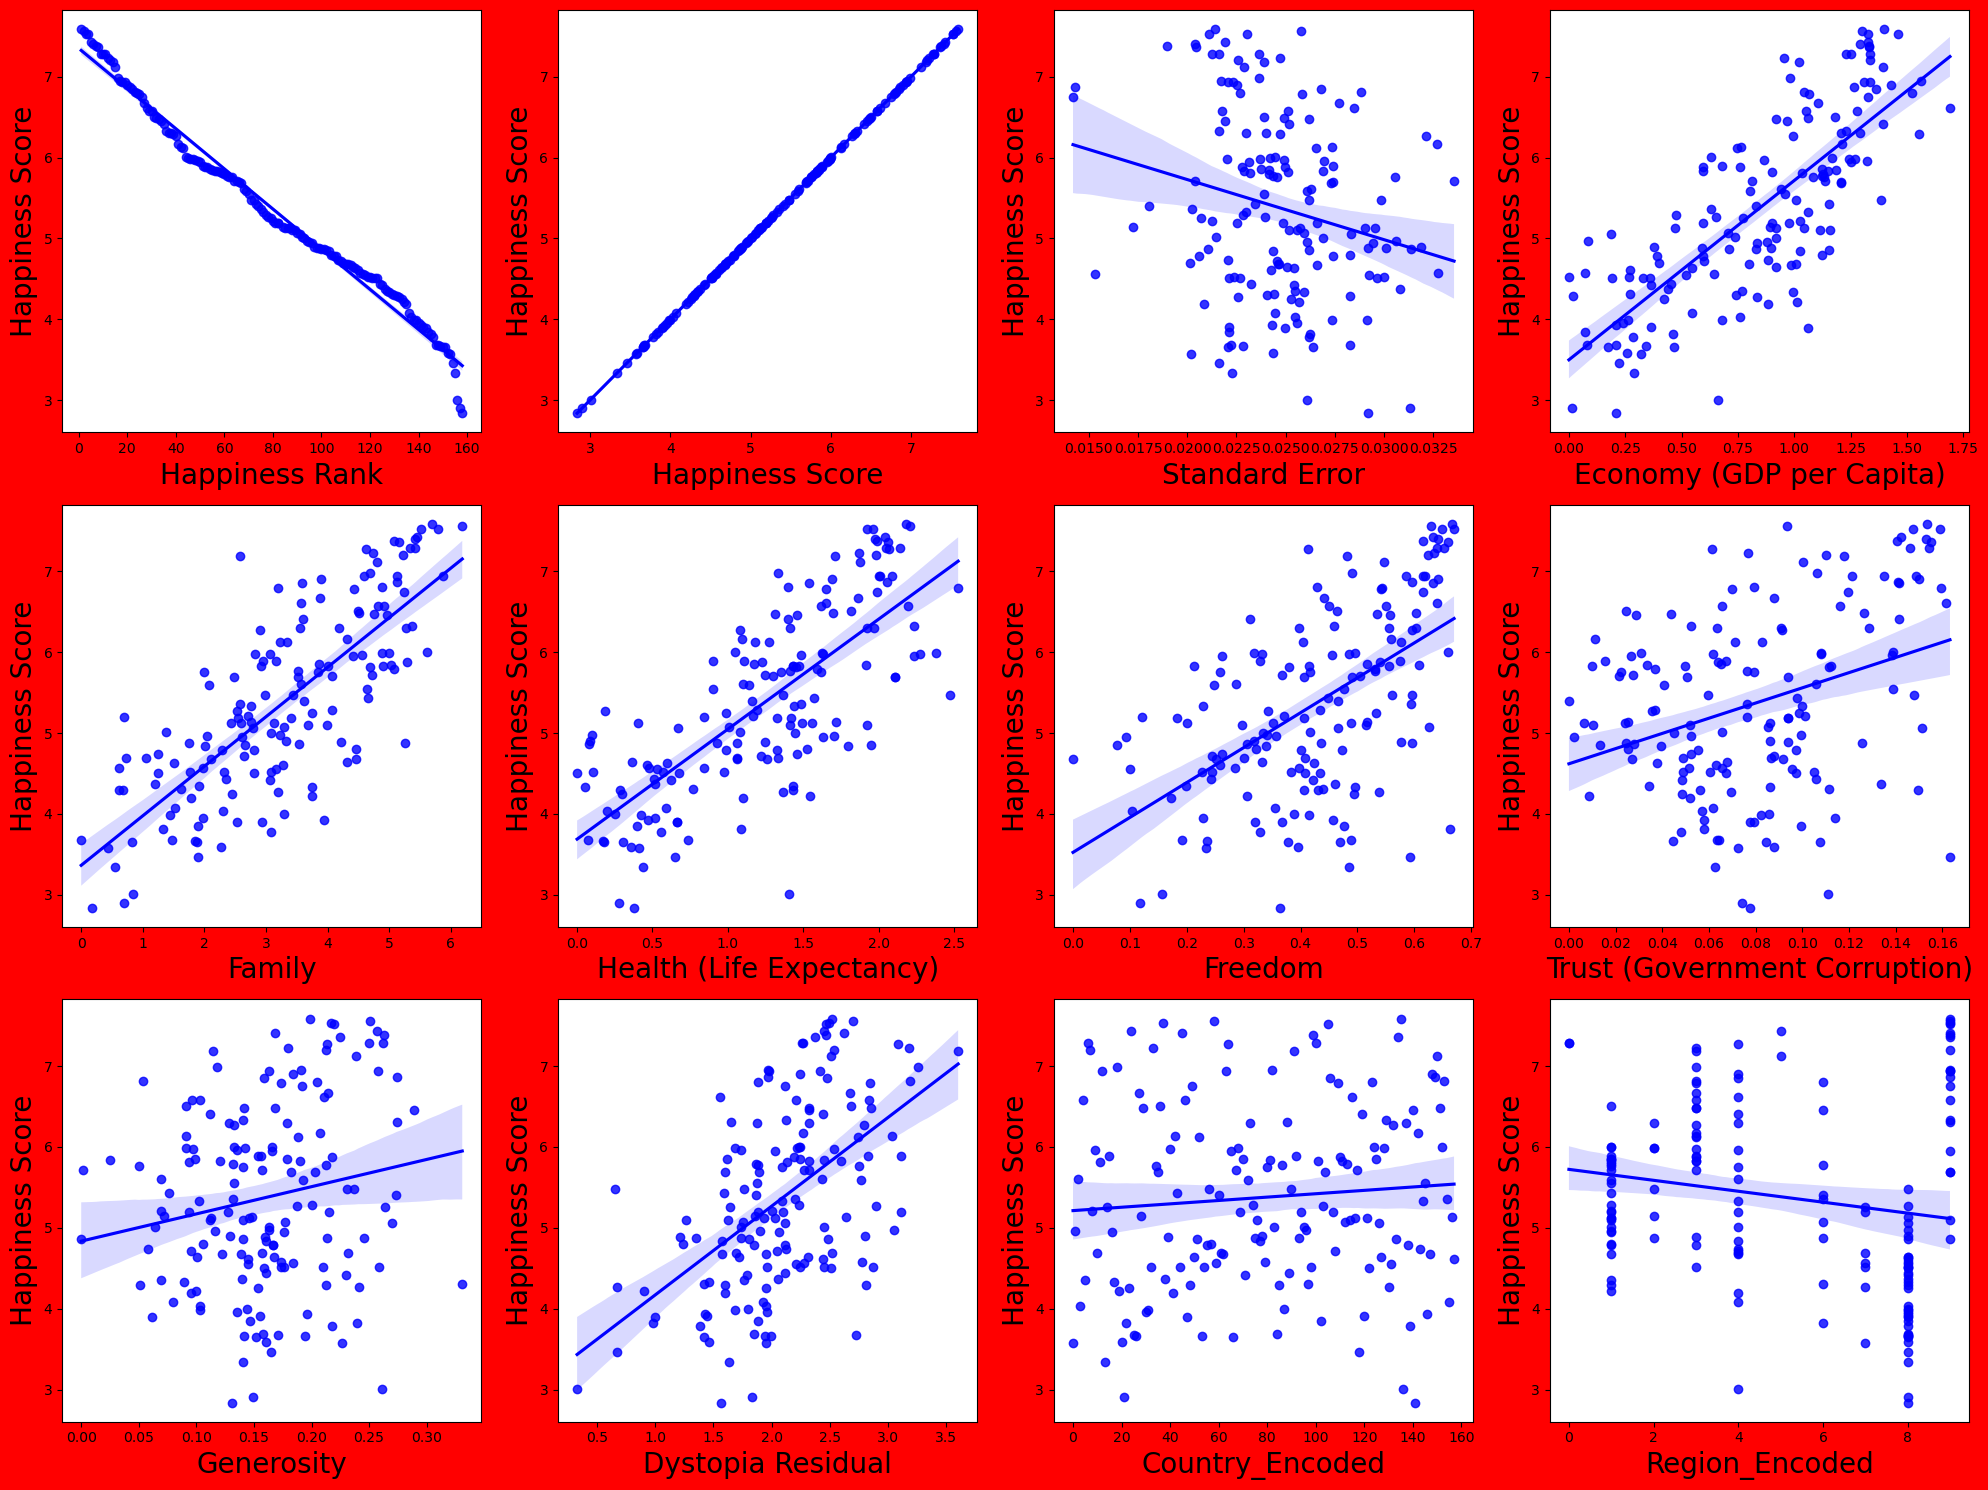

In [28]:

plt.figure(figsize=(20, 15), facecolor='red')

plotnumber = 1
for column in df1: 
    if plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber) 
        sns.regplot(y='Happiness Score', x=column, data=df1, color='blue')  
        plt.ylabel("Happiness Score", fontsize=20)
        plt.xlabel(column,fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()


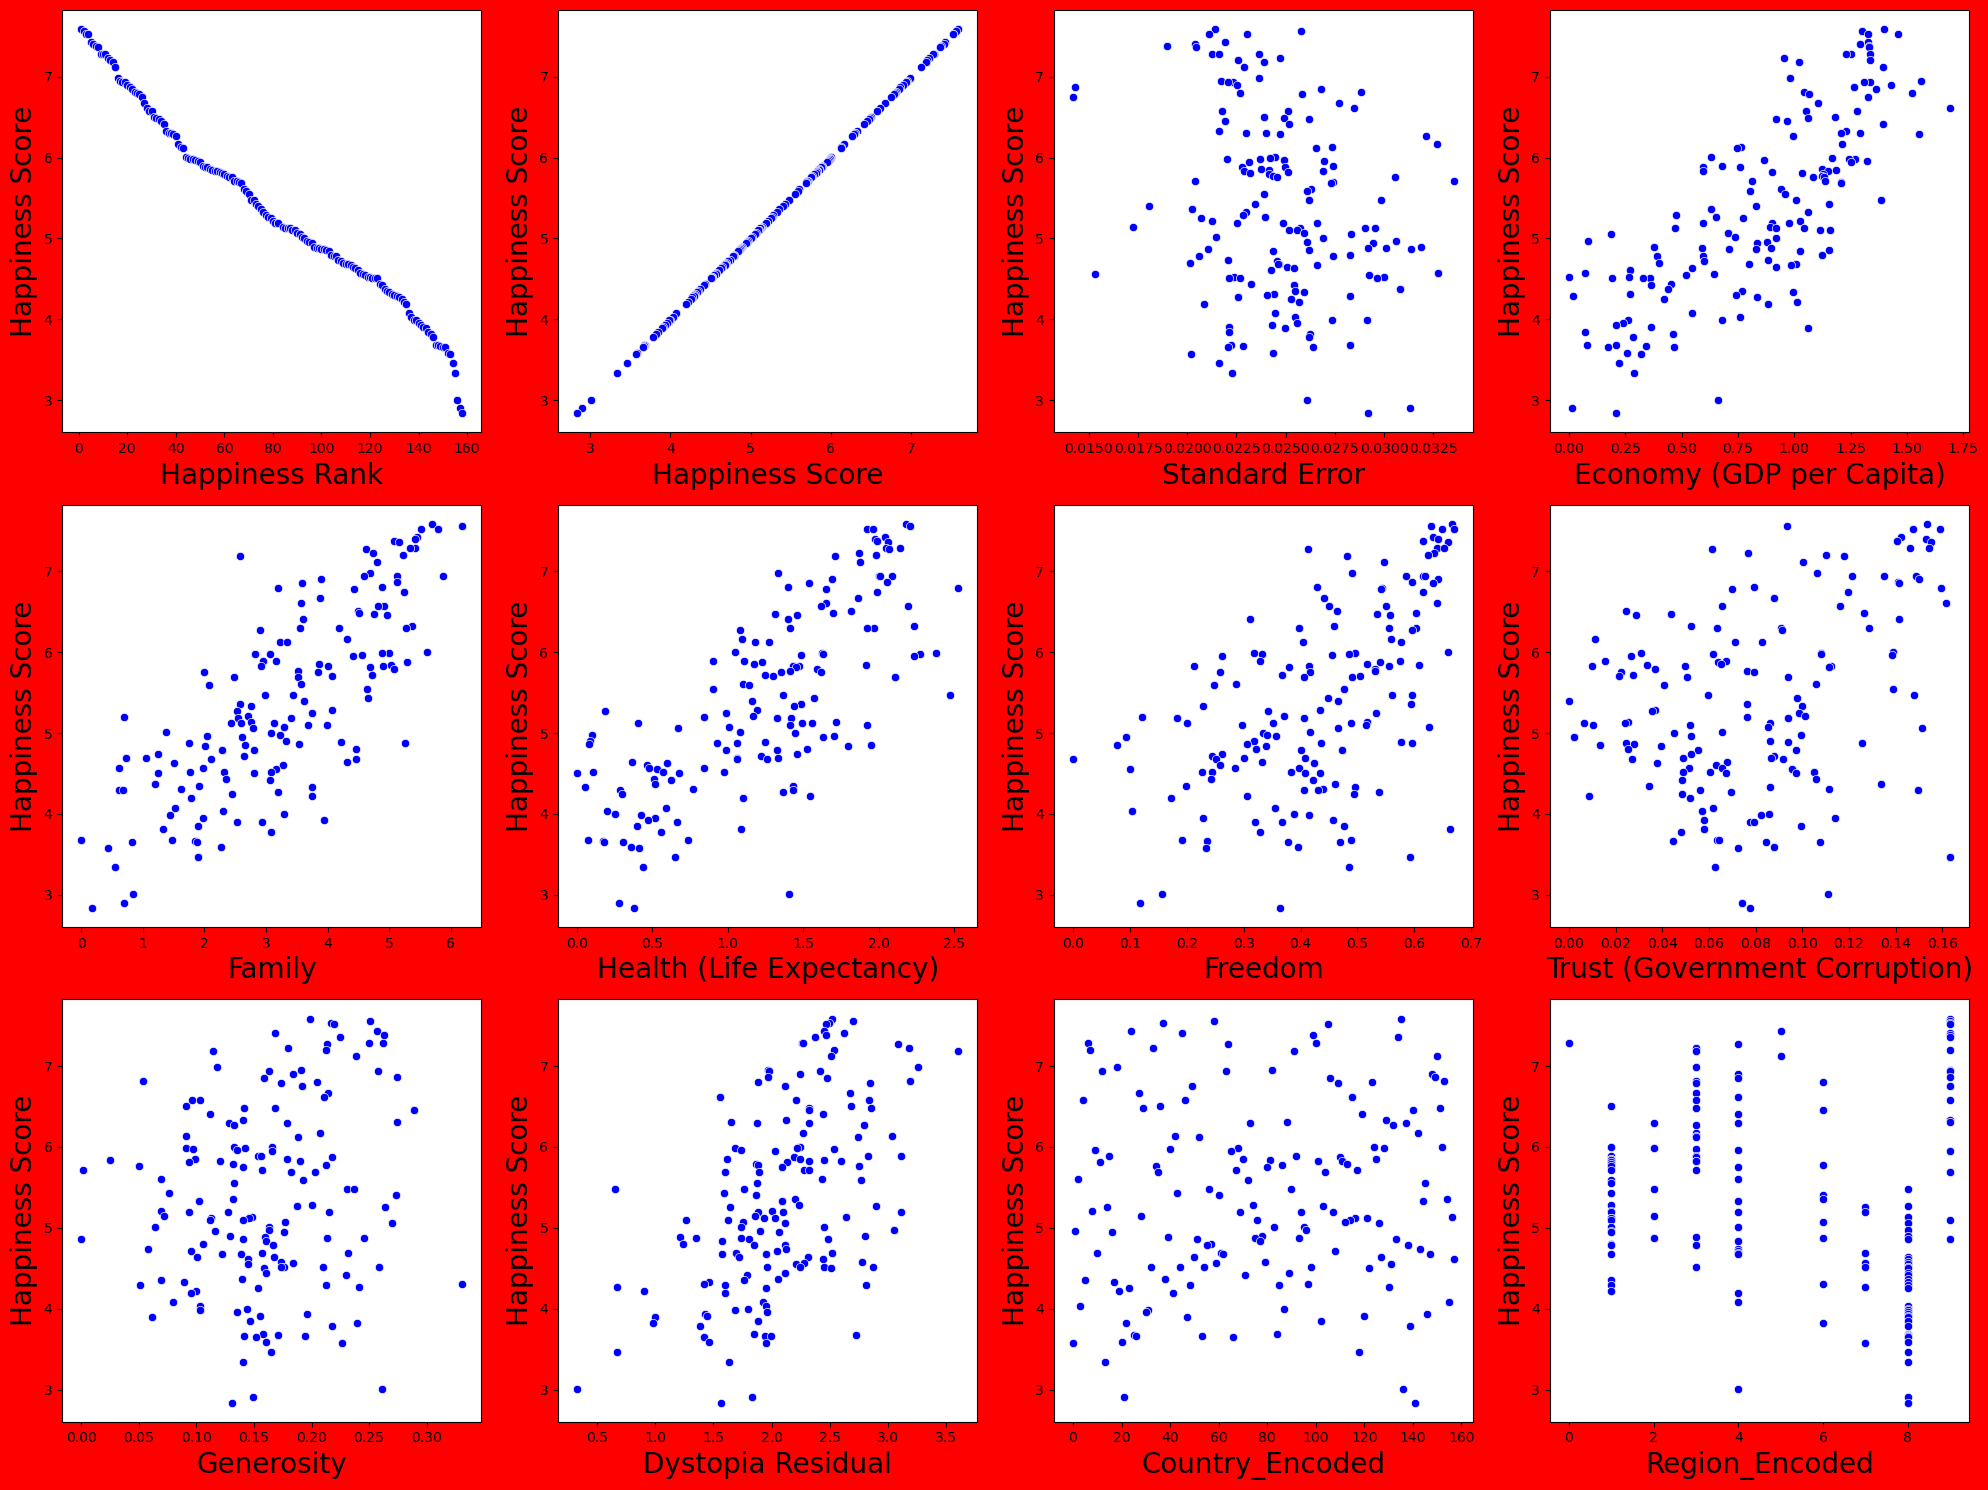

In [29]:

plt.figure(figsize=(20, 15), facecolor='red')

plotnumber = 1
for column in df1: 
    if plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber) 
        sns.scatterplot(y='Happiness Score', x=column, data=df1, color='blue')  
        plt.ylabel("Happiness Score", fontsize=20)
        plt.xlabel(column,fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()


In [30]:
# by Observing above scatter plot and regplot i feel except country and region columns all other columns has Positive correlation with
# label, but this relationship doesn't seems strong as data is very much scattered.

In [31]:
cor = df1.corr()
cor

Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.992105   
Happiness Score                     -0.992105         1.000000   
Standard Error                       0.202484        -0.222188   
Economy (GDP per Capita)            -0.785267         0.780966   
Family                              -0.768870         0.773908   
Health (Life Expectancy)            -0.757843         0.749896   
Freedom                             -0.556886         0.568211   
Trust (Government Corruption)       -0.318103         0.338561   
Generosity                          -0.159168         0.178763   
Dystopia Residual                   -0.521999         0.530474   
Country_Encoded                     -0.098538         0.083380   
Region_Encoded                       0.213773        -0.176791   

                               Standard Error  Economy (GDP per Capita)  \
Happiness Rank                       0.202484                 -0.785267   
Happiness Score                     -0.222188                  0.780966   
Standard Error                       1.000000                 -0.221376   
Economy (GDP per Capita)            -0.221376                  1.000000   
Family                              -0.189263                  0.662390   
Health (Life Expectancy)            -0.318546                  0.838278   
Freedom                             -0.186313                  0.370300   
Trust (Government Corruption)       -0.156602                  0.215532   
Generosity                          -0.100144                 -0.034839   
Dystopia Residual                    0.035111                  0.040059   
Country_Encoded                      0.013630                  0.037808   
Region_Encoded                      -0.075395                 -0.260139   

                                 Family  Health (Life Expectancy)   Freedom  \
Happiness Rank                -0.768870                 -0.757843 -0.556886   
Happiness Score                0.773908                  0.749896  0.568211   
Standard Error                -0.189263                 -0.318546 -0.186313   
Economy (GDP per Capita)       0.662390                  0.838278  0.370300   
Family                         1.000000                  0.581167  0.502414   
Health (Life Expectancy)       0.581167                  1.000000  0.382351   
Freedom                        0.502414                  0.382351  1.000000   
Trust (Government Corruption)  0.188079                  0.187954  0.464543   
Generosity                     0.126712                  0.097270  0.395684   
Dystopia Residual              0.172593                  0.036249  0.062783   
Country_Encoded                0.141419                  0.027141  0.085684   
Region_Encoded                -0.134083                 -0.288460  0.092567   

                               Trust (Government Corruption)  Generosity  \
Happiness Rank                                     -0.318103   -0.159168   
Happiness Score                                     0.338561    0.178763   
Standard Error                                     -0.156602   -0.100144   
Economy (GDP per Capita)                            0.215532   -0.034839   
Family                                              0.188079    0.126712   
Health (Life Expectancy)                            0.187954    0.097270   
Freedom                                             0.464543    0.395684   
Trust (Government Corruption)                       1.000000    0.266287   
Generosity                                          0.266287    1.000000   
Dystopia Residual                                   0.010689   -0.072491   
Country_Encoded                                     0.044136    0.124585   
Region_Encoded                                      0.212647    0.300229   

                               Dystopia Residual  Country_Encoded  \
Happiness Rank                         -0.521999        -0.098538   
Happiness Score                         0

In [32]:
# here i observed happiness rank has strong positive correlation with economy,family and health columns
# also health and economy columns has strong positive correlation with each other


In [33]:

correlation_matrix = df1.corr()

happiness_correlation = correlation_matrix['Happiness Score']
    
print(happiness_correlation)


Happiness Rank                  -0.992105
Happiness Score                  1.000000
Standard Error                  -0.222188
Economy (GDP per Capita)         0.780966
Family                           0.773908
Health (Life Expectancy)         0.749896
Freedom                          0.568211
Trust (Government Corruption)    0.338561
Generosity                       0.178763
Dystopia Residual                0.530474
Country_Encoded                  0.083380
Region_Encoded                  -0.176791
Name: Happiness Score, dtype: float64


In [34]:
# here i observed 
# Standard Error,Trust,Generosity,Region columns has low correlation with label
# Happiness Rank has strong positive correlation with label
# Freedom, Dystopia Residual these columns has medium correlation with label
# economy,family,health, these columns has strong positive correlation with label
# country column has no correlation with label

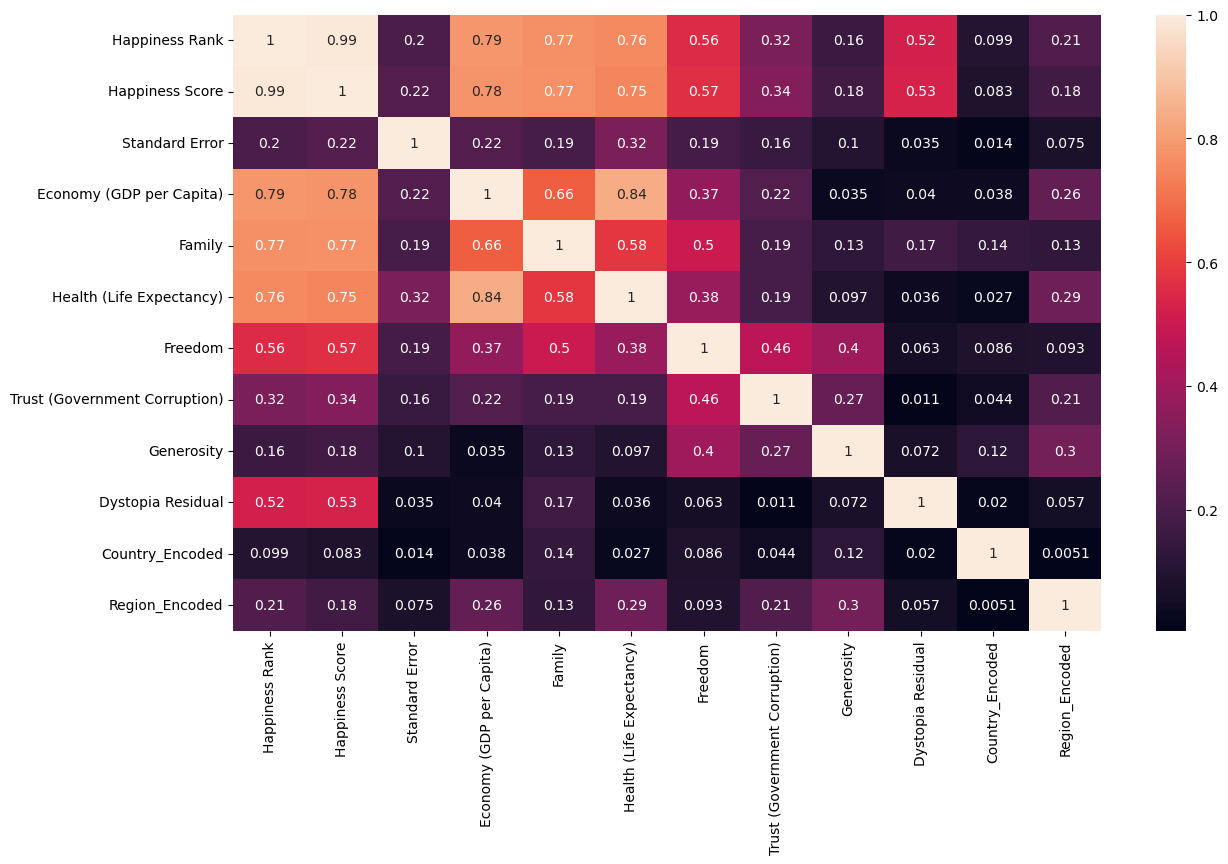

In [35]:
df_coef = df1.corr().abs()
plt.figure(figsize=(14,8))
sns.heatmap(df_coef,annot=True)
plt.show()

In [36]:
# here i can see that happiness score and happiness rank has highest Correlation.Also health and economy has second highest correlation value
# Economy,family,health these columns has significantly high coorelation with label(happiness score) 

In [37]:
# let's separate features and label
x = df1.drop(['Happiness Score'],axis=1)
y = df1['Happiness Score']
x.columns

Index(['Happiness Rank', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual',
       'Country_Encoded', 'Region_Encoded'],
      dtype='object')

In [38]:
# let's scale the data 
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Happiness Rank  Standard Error  Economy (GDP per Capita)    Family  \
0         -1.721000       -0.972226                  1.369621  1.669206   
1         -1.699075        0.309350                  1.135226  2.012132   
2         -1.677149       -1.062017                  1.192861  1.739586   
3         -1.655224       -0.503610                  1.525130  1.553118   
4         -1.633299       -0.823548                  1.194876  1.501726   
..              ...             ...                       ...       ...   
153        1.633576       -0.916014                 -1.552987 -0.959885   
154        1.655501       -0.719479                 -1.392303 -1.896644   
155        1.677427        0.399137                 -0.455245 -1.690664   
156        1.699352        1.926902                 -2.067566 -1.796803   
157        1.721277        1.310323                 -1.586334 -2.160397   

     Health (Life Expectancy)   Freedom  Trust (Government Corruption)  \
0                    1.491765  1.577438                       1.773991   
1                    1.532348  1.332456                       0.315993   
2                    1.085223  1.469659                       1.906792   
3                    1.147600  1.605131                       1.624007   
4                    1.270179  1.360416                       1.503484   
..                        ...       ...                            ...   
153                 -0.939459  1.087740                       2.012856   
154                 -1.276496  0.372033                      -0.433835   
155                  0.262933 -1.809238                       0.738915   
156                 -1.525700 -2.064472                      -0.151946   
157                 -1.371811 -0.426621                      -0.067326   

     Generosity  Dystopia Residual  Country_Encoded  Region_Encoded  
0      0.622391           0.758258         1.238770        1.300256  
1      1.480995           1.092857        -0.449465        1.300256  
2      0.927973           0.712335        -0.909893        1.300256  
3      0.964080           0.663893         0.581016        1.300256  
4      1.592224           0.639337        -1.194920       -0.040302  
..          ...                ...              ...             ...  
153    0.065304          -2.588925         0.866043        0.965117  
154   -0.334169          -0.843967        -1.436096        0.965117  
155    1.659336          -3.208430         1.260695       -0.375441  
156   -0.194829          -0.481985        -1.260695        0.965117  
157   -0.490415          -0.963612         1.370321        0.965117  

[158 rows x 11 columns]

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['VIF features'] = x.columns
vif

VIF values                   VIF features
0    65.648279                 Happiness Rank
1     1.190204                 Standard Error
2    12.639852       Economy (GDP per Capita)
3     5.454367                         Family
4     7.585471       Health (Life Expectancy)
5     2.936928                        Freedom
6     1.795358  Trust (Government Corruption)
7     2.056268                     Generosity
8    14.719899              Dystopia Residual
9     1.101865                Country_Encoded
10    1.540660                 Region_Encoded

In [40]:
# after scaling the data i observed happiness rank has highest vif score.
# i will drop happiness rank column to handle multicoliniarity issue

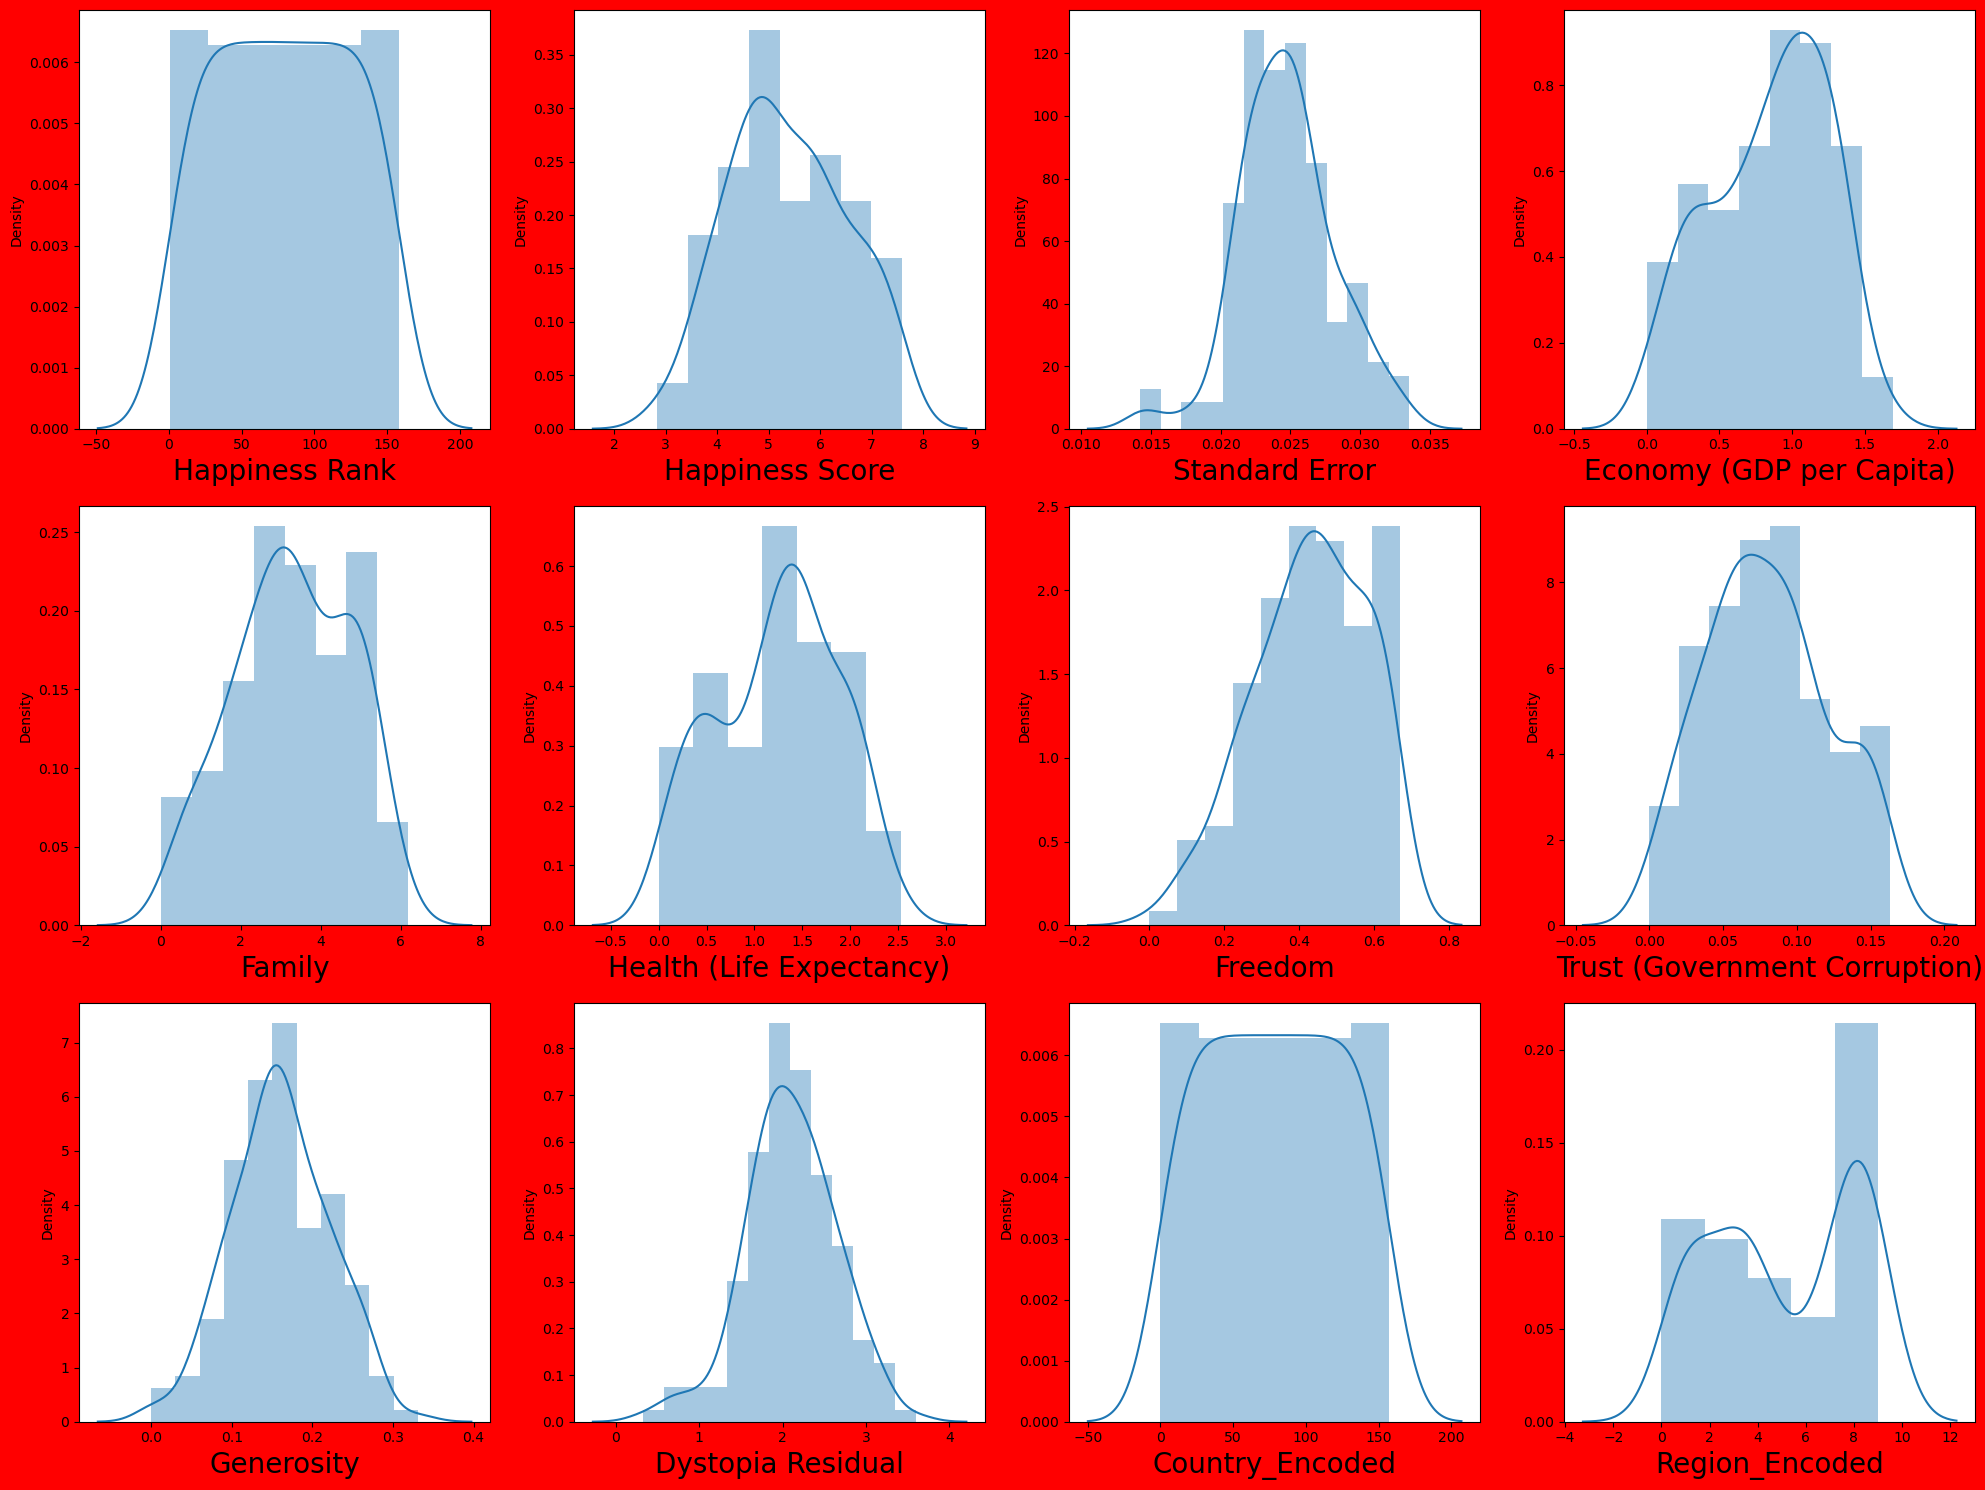

In [41]:
# lets visualise the data distribution through graphs
plt.figure(figsize=(20, 15), facecolor='red')

plotnumber = 1
for column in df1.columns: 
    if plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber) 
        sns.distplot(df1[column])  
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()

In [42]:
# after removing skewness,here i can observe data distribution is normal

In [43]:
# let's Separate features and label and plot a box plot to check Outliers 
df_feature = df1.drop ('Happiness Score',axis =1)
df_feature

Happiness Rank  Standard Error  Economy (GDP per Capita)    Family  \
0                 1        0.021419                   1.39651  5.691972   
1                 2        0.025790                   1.30232  6.186694   
2                 3        0.021113                   1.32548  5.793505   
3                 4        0.023018                   1.45900  5.524497   
4                 5        0.021926                   1.32629  5.450357   
..              ...             ...                       ...       ...   
153             154        0.021611                   0.22208  1.899117   
154             155        0.022281                   0.28665  0.547704   
155             156        0.026096                   0.66320  0.844861   
156             157        0.031307                   0.01530  0.691739   
157             158        0.029204                   0.20868  0.167201   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                    2.179346  0.66557                       0.153413   
1                    2.204887  0.62877                       0.093425   
2                    1.923489  0.64938                       0.158877   
3                    1.962746  0.66973                       0.147242   
4                    2.039891  0.63297                       0.142283   
..                        ...      ...                            ...   
153                  0.649256  0.59201                       0.163241   
154                  0.437142  0.48450                       0.062574   
155                  1.405981  0.15684                       0.110826   
156                  0.280306  0.11850                       0.074172   
157                  0.377155  0.36453                       0.077654   

     Generosity  Dystopia Residual  Country_Encoded  Region_Encoded  
0      0.198464            2.51738              135               9  
1      0.250490            2.70201               58               9  
2      0.216981            2.49204               37               9  
3      0.219169            2.46531              105               9  
4      0.257230            2.45176               24               5  
..          ...                ...              ...             ...  
153    0.164709            0.67042              118               8  
154    0.140503            1.63328               13               8  
155    0.261297            0.32858              136               4  
156    0.148946            1.83302               21               8  
157    0.131036            1.56726              141               8  

[158 rows x 11 columns]

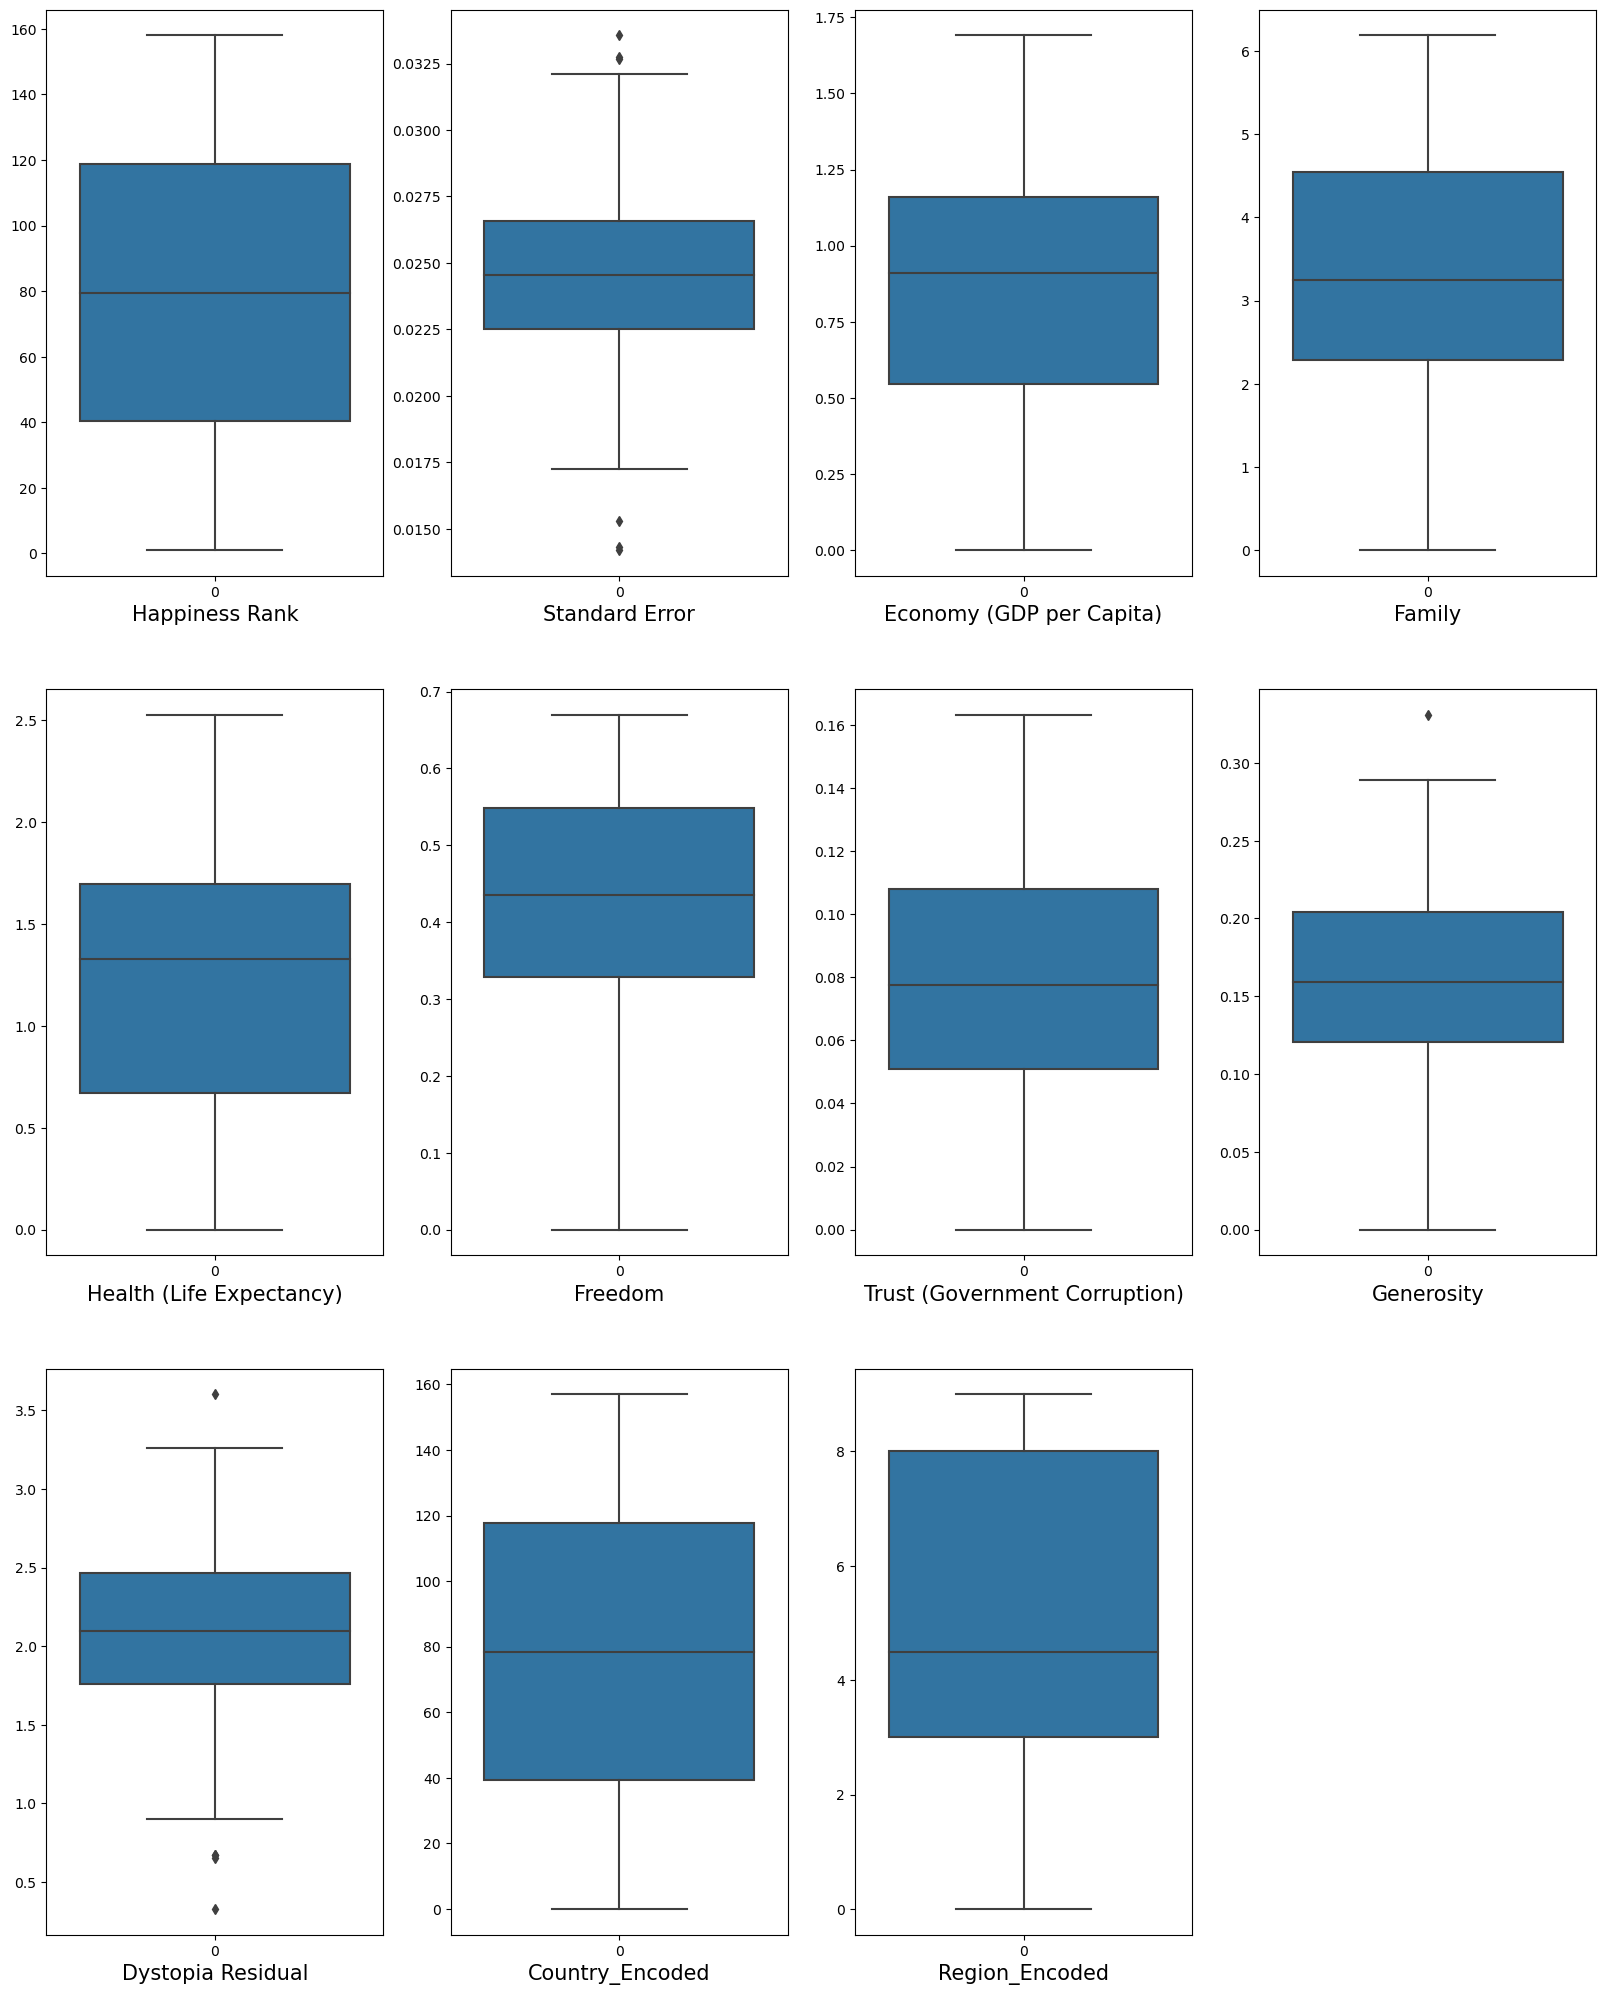

In [44]:
plt.figure(figsize=(20,25))
graph = 1
for column in df_feature:
    if graph <=12:
        plt.subplot(3,4,graph)
        ax = sns.boxplot(data=df_feature[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [45]:
# here i observed Standard error,generosity and Dystopia residual has few outliers 

In [46]:
# using zscore method to treat outliers
from scipy.stats import zscore
features = df1[['Standard Error','Generosity','Dystopia Residual']]
z = np.abs(zscore(features))
z

Standard Error  Generosity  Dystopia Residual
0          0.972226    0.622391           0.758258
1          0.309350    1.480995           1.092857
2          1.062017    0.927973           0.712335
3          0.503610    0.964080           0.663893
4          0.823548    1.592224           0.639337
..              ...         ...                ...
153        0.916014    0.065304           2.588925
154        0.719479    0.334169           0.843967
155        0.399137    1.659336           3.208430
156        1.926902    0.194829           0.481985
157        1.310323    0.490415           0.963612

[158 rows x 3 columns]

In [47]:
np.where(z>3)

(array([ 20,  25, 155]), array([0, 0, 2]))

In [48]:
z.iloc[155,2]

3.2084304855119403

In [49]:
df_zscore = df1[(z<3).all(axis=1)]

In [50]:
df_zscore.shape

(155, 12)

In [51]:
print('old df shape-',df1.shape[0])
print('df_zscore shape-',df_zscore.shape[0])

old df shape- 158
df_zscore shape- 155


In [52]:
print ('data loss percentage ',((df1.shape[0]-df_zscore.shape[0])/df1.shape[0])*100)

data loss percentage  1.89873417721519


In [53]:
#IQR METHOD
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3-Q1
df_iqr = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [54]:
print('old df shape-',df1.shape[0])
print('df_zscore shape-',df_zscore.shape[0])
print('df_iqr shape-',df_iqr.shape[0])

old df shape- 158
df_zscore shape- 155
df_iqr shape- 146


In [55]:
# so here i can see by using zscore method i loose less data as compared to IQR method. Hence i will use zscore method to remove outliers

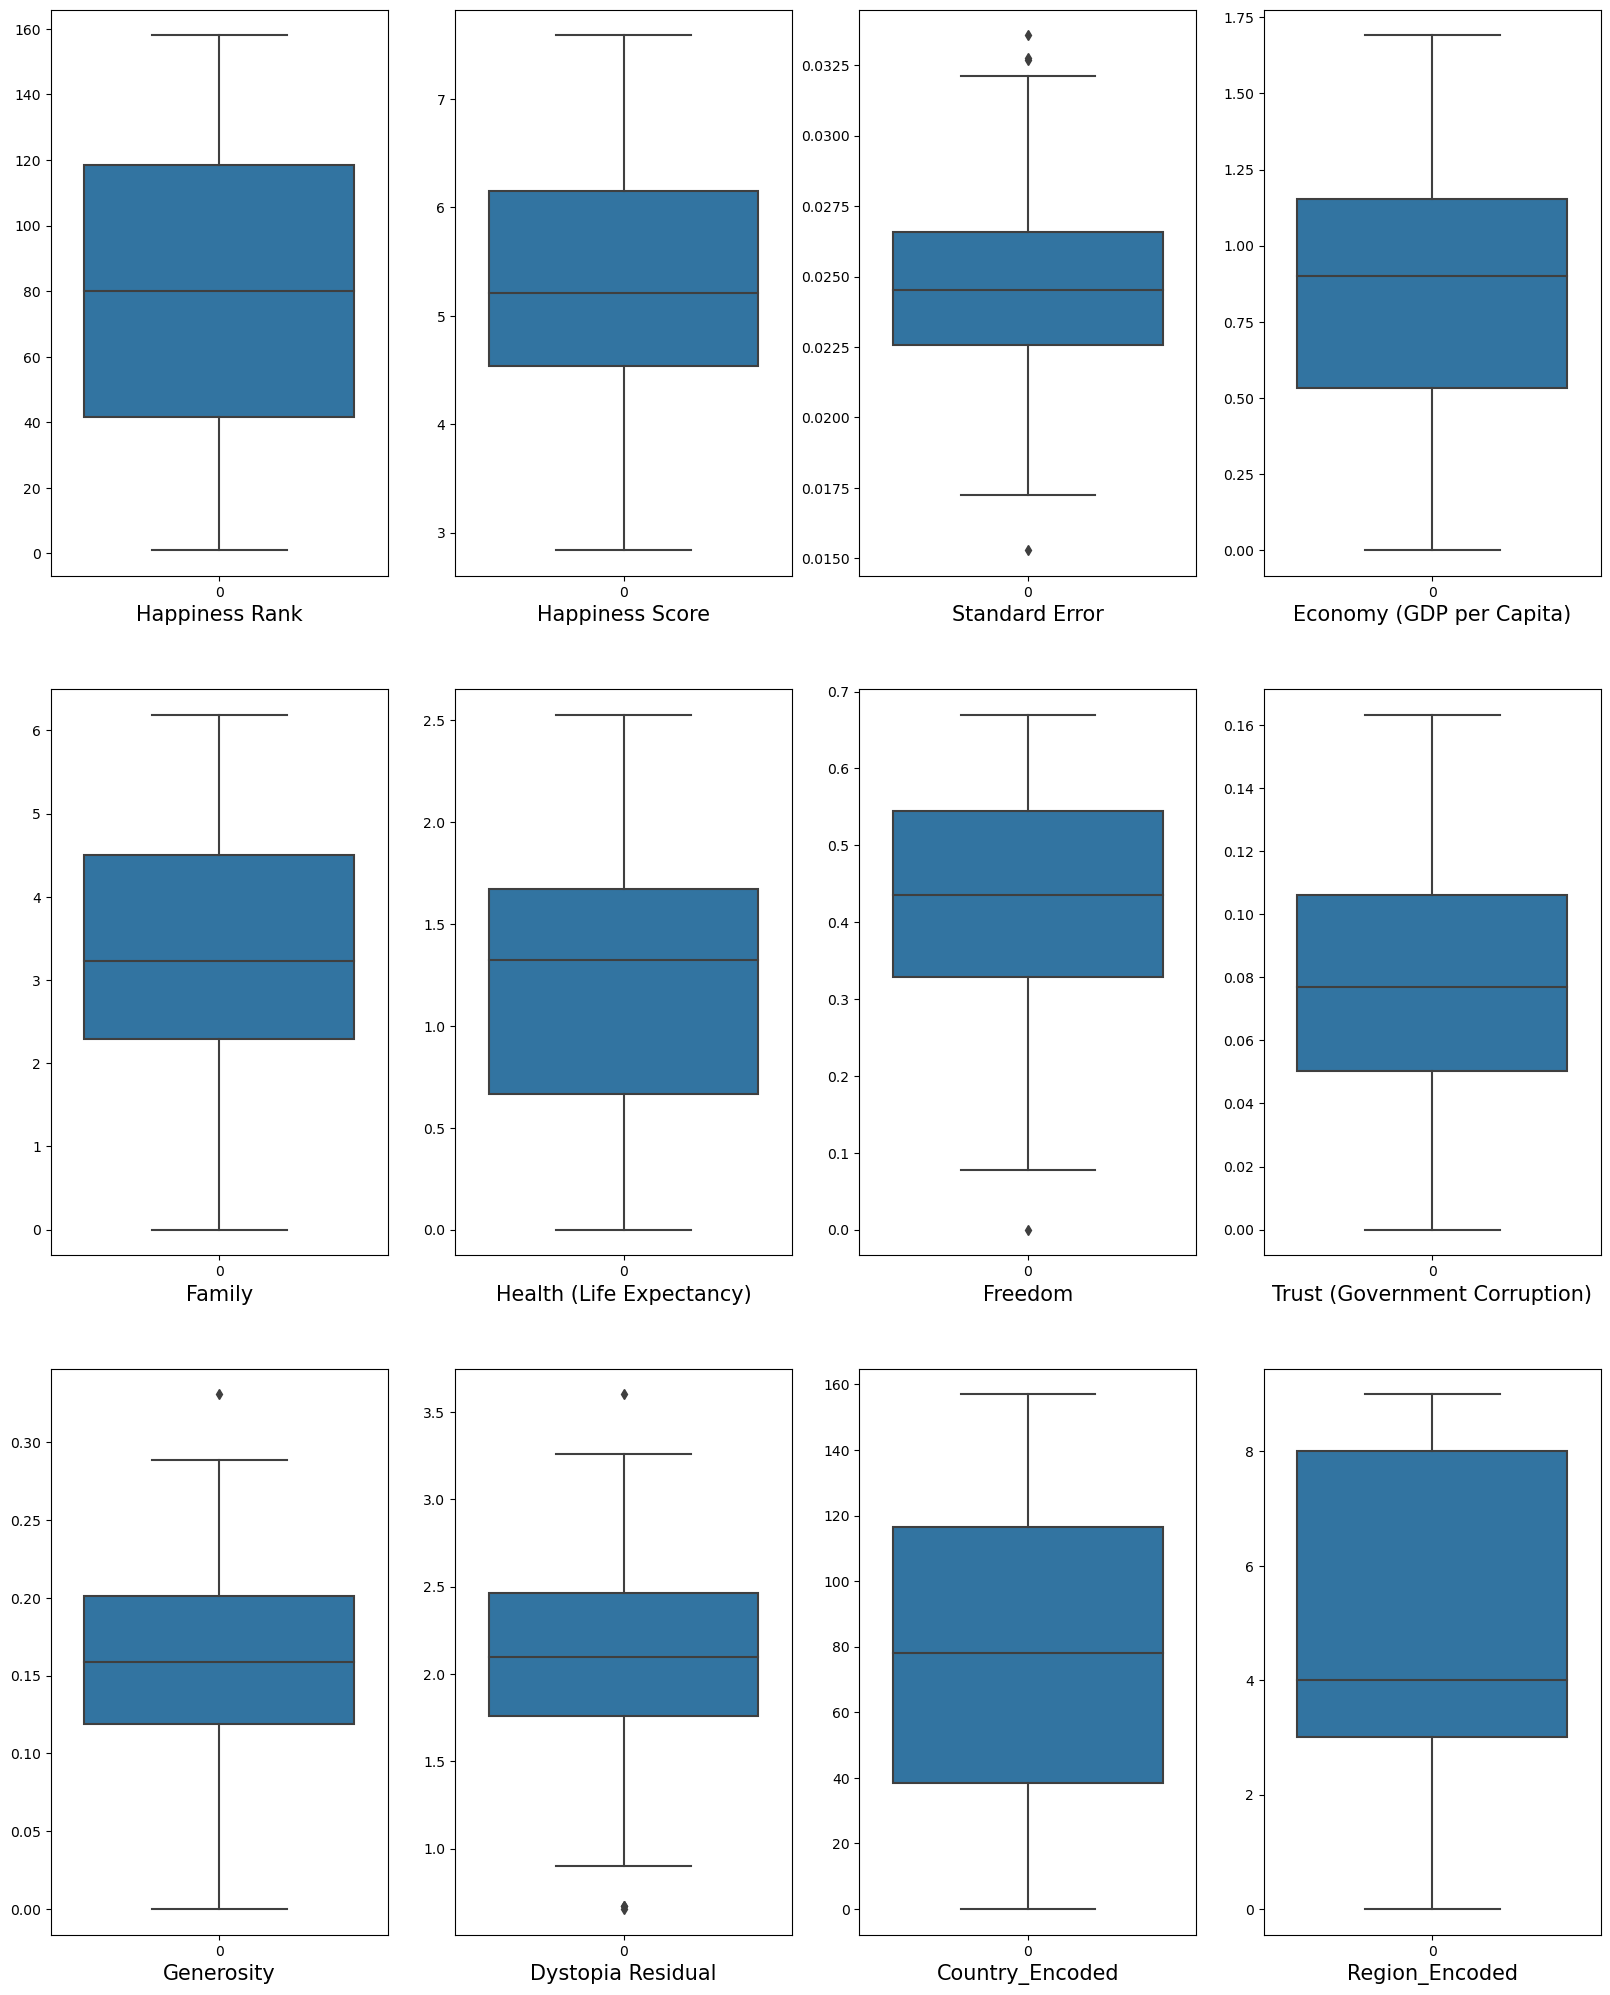

In [56]:
plt.figure(figsize=(20,25))
graph = 1
for column in df_zscore:
    if graph <=12:
        plt.subplot(3,4,graph)
        ax = sns.boxplot(data=df_zscore[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

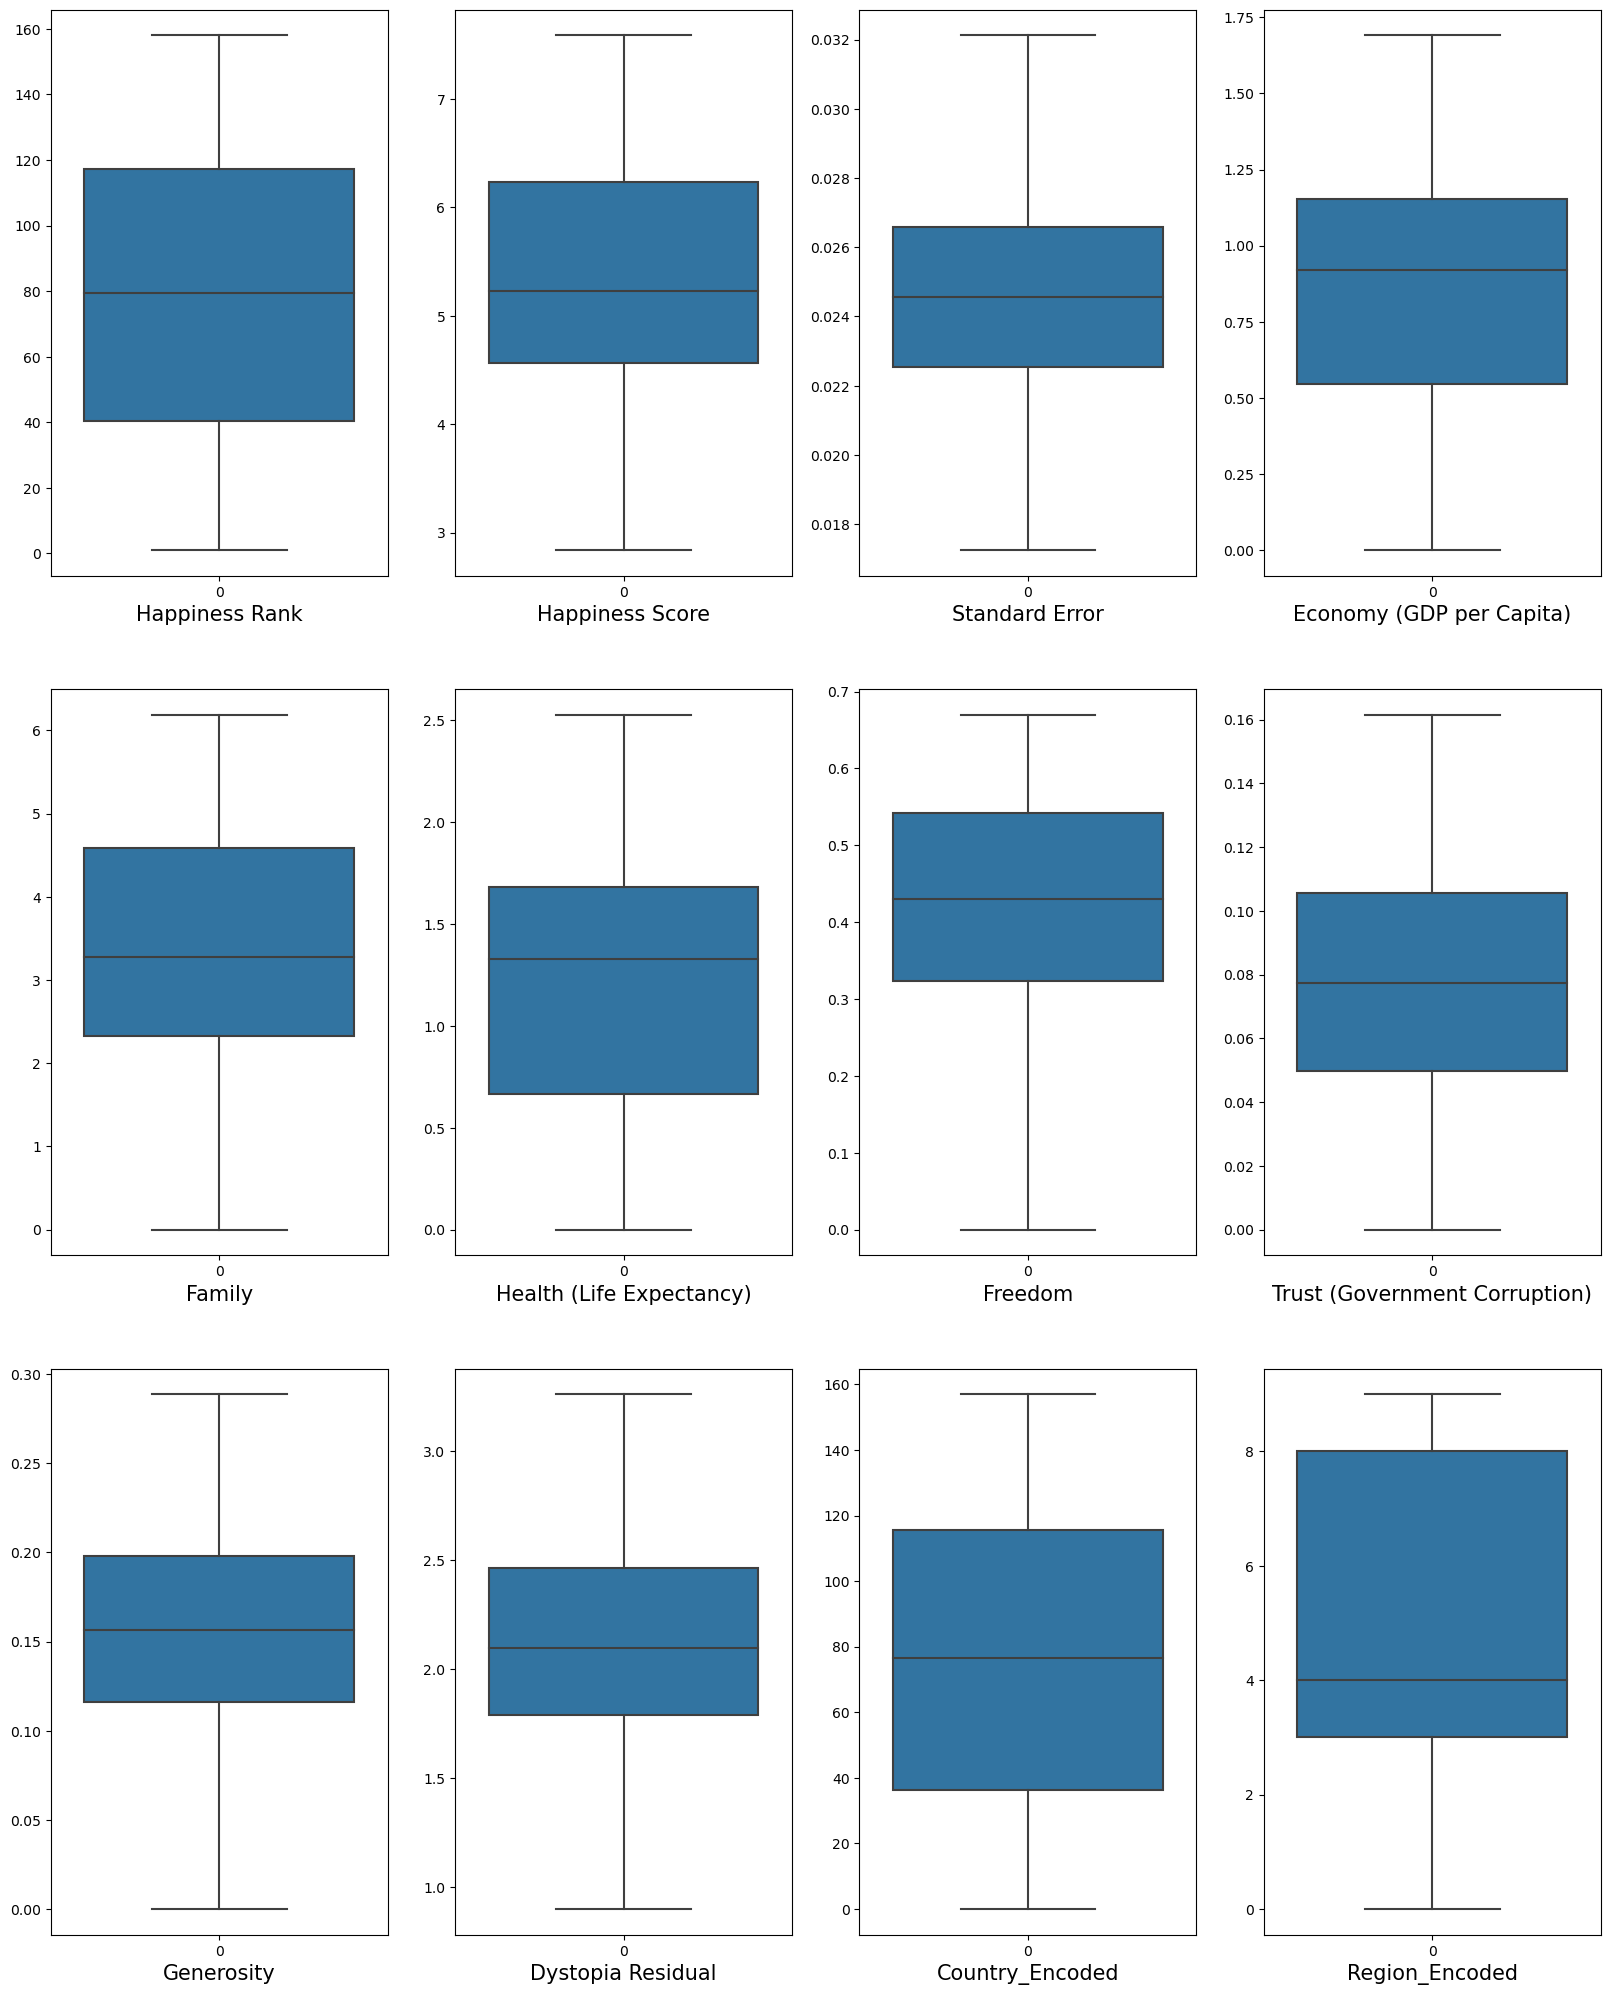

In [57]:
plt.figure(figsize=(20,25))
graph = 1
for column in df_iqr:
    if graph <=12:
        plt.subplot(3,4,graph)
        ax = sns.boxplot(data=df_iqr[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [58]:
# after using zscore and IQR methods i again plot a box plot for both of their results, here i observed with zscore no outlier was removed insted it increased one more outlier in Freedom column
# on the other hand IQR method removed all the outliers from all the columns
# but with IQR i am loosing more data than the zscore, as data set is already small i Can't loose more data also i might drop one of the columns to handle multicoliniarity.
# in that cace i cant afford to loose more data.
# hence keeping these points in mind i decide not to remove outlier. 
# as removing outliers not helping much, instead their is more risk of loosing data unnecessarily 

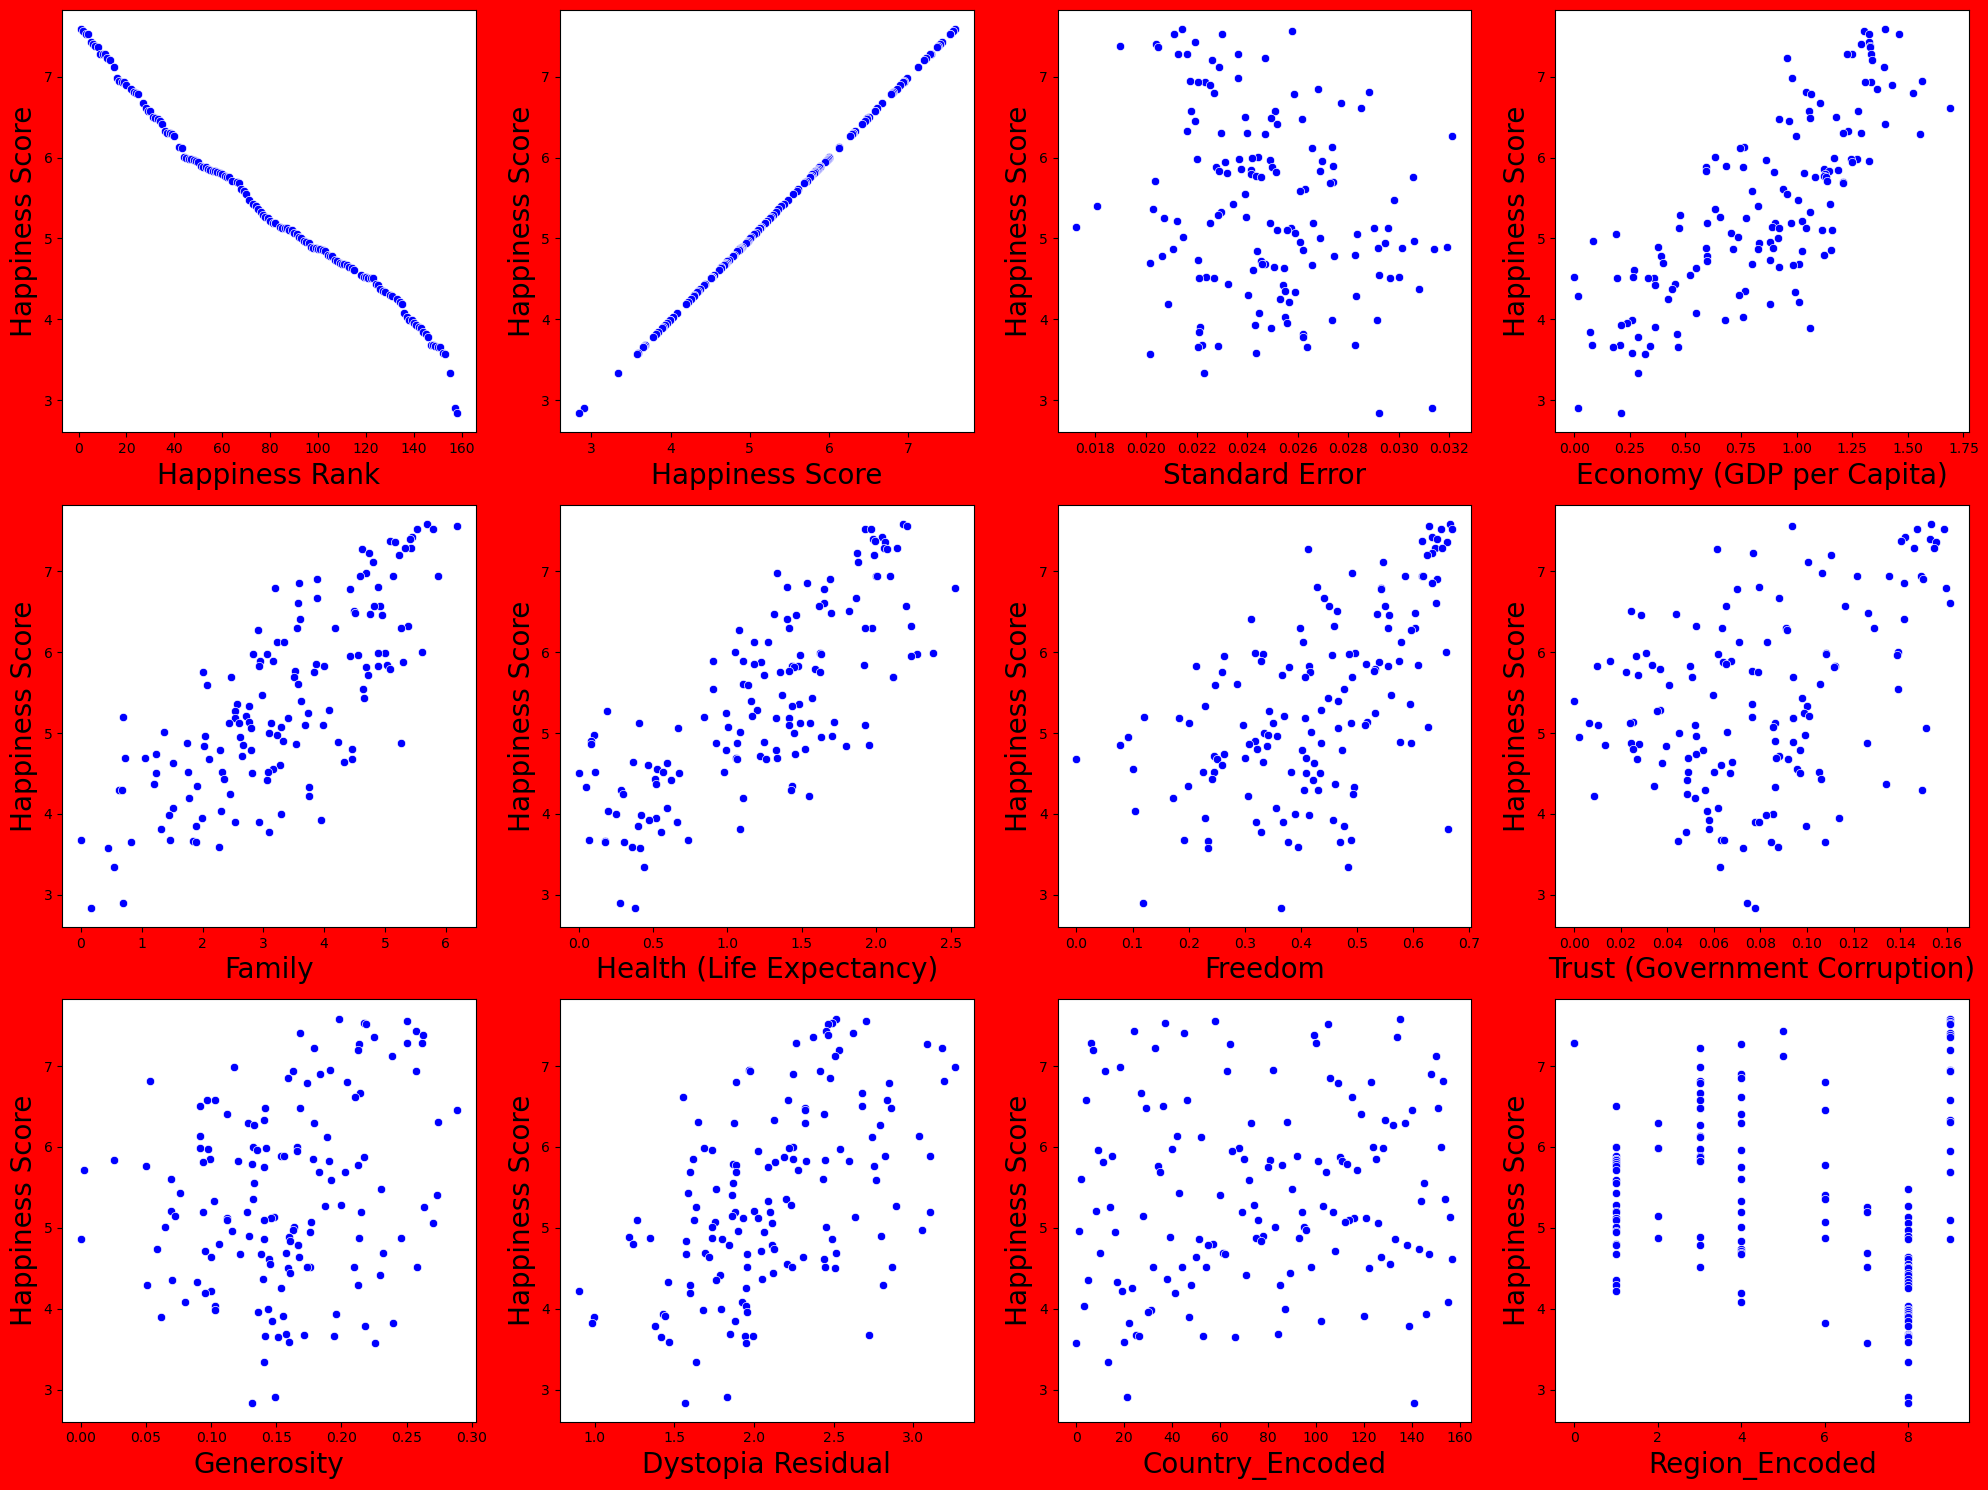

In [59]:

plt.figure(figsize=(20, 15), facecolor='red')

plotnumber = 1
for column in df_iqr: 
    if plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber) 
        sns.scatterplot(y='Happiness Score', x=column, data=df_iqr, color='blue')  
        plt.ylabel("Happiness Score", fontsize=20)
        plt.xlabel(column,fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()


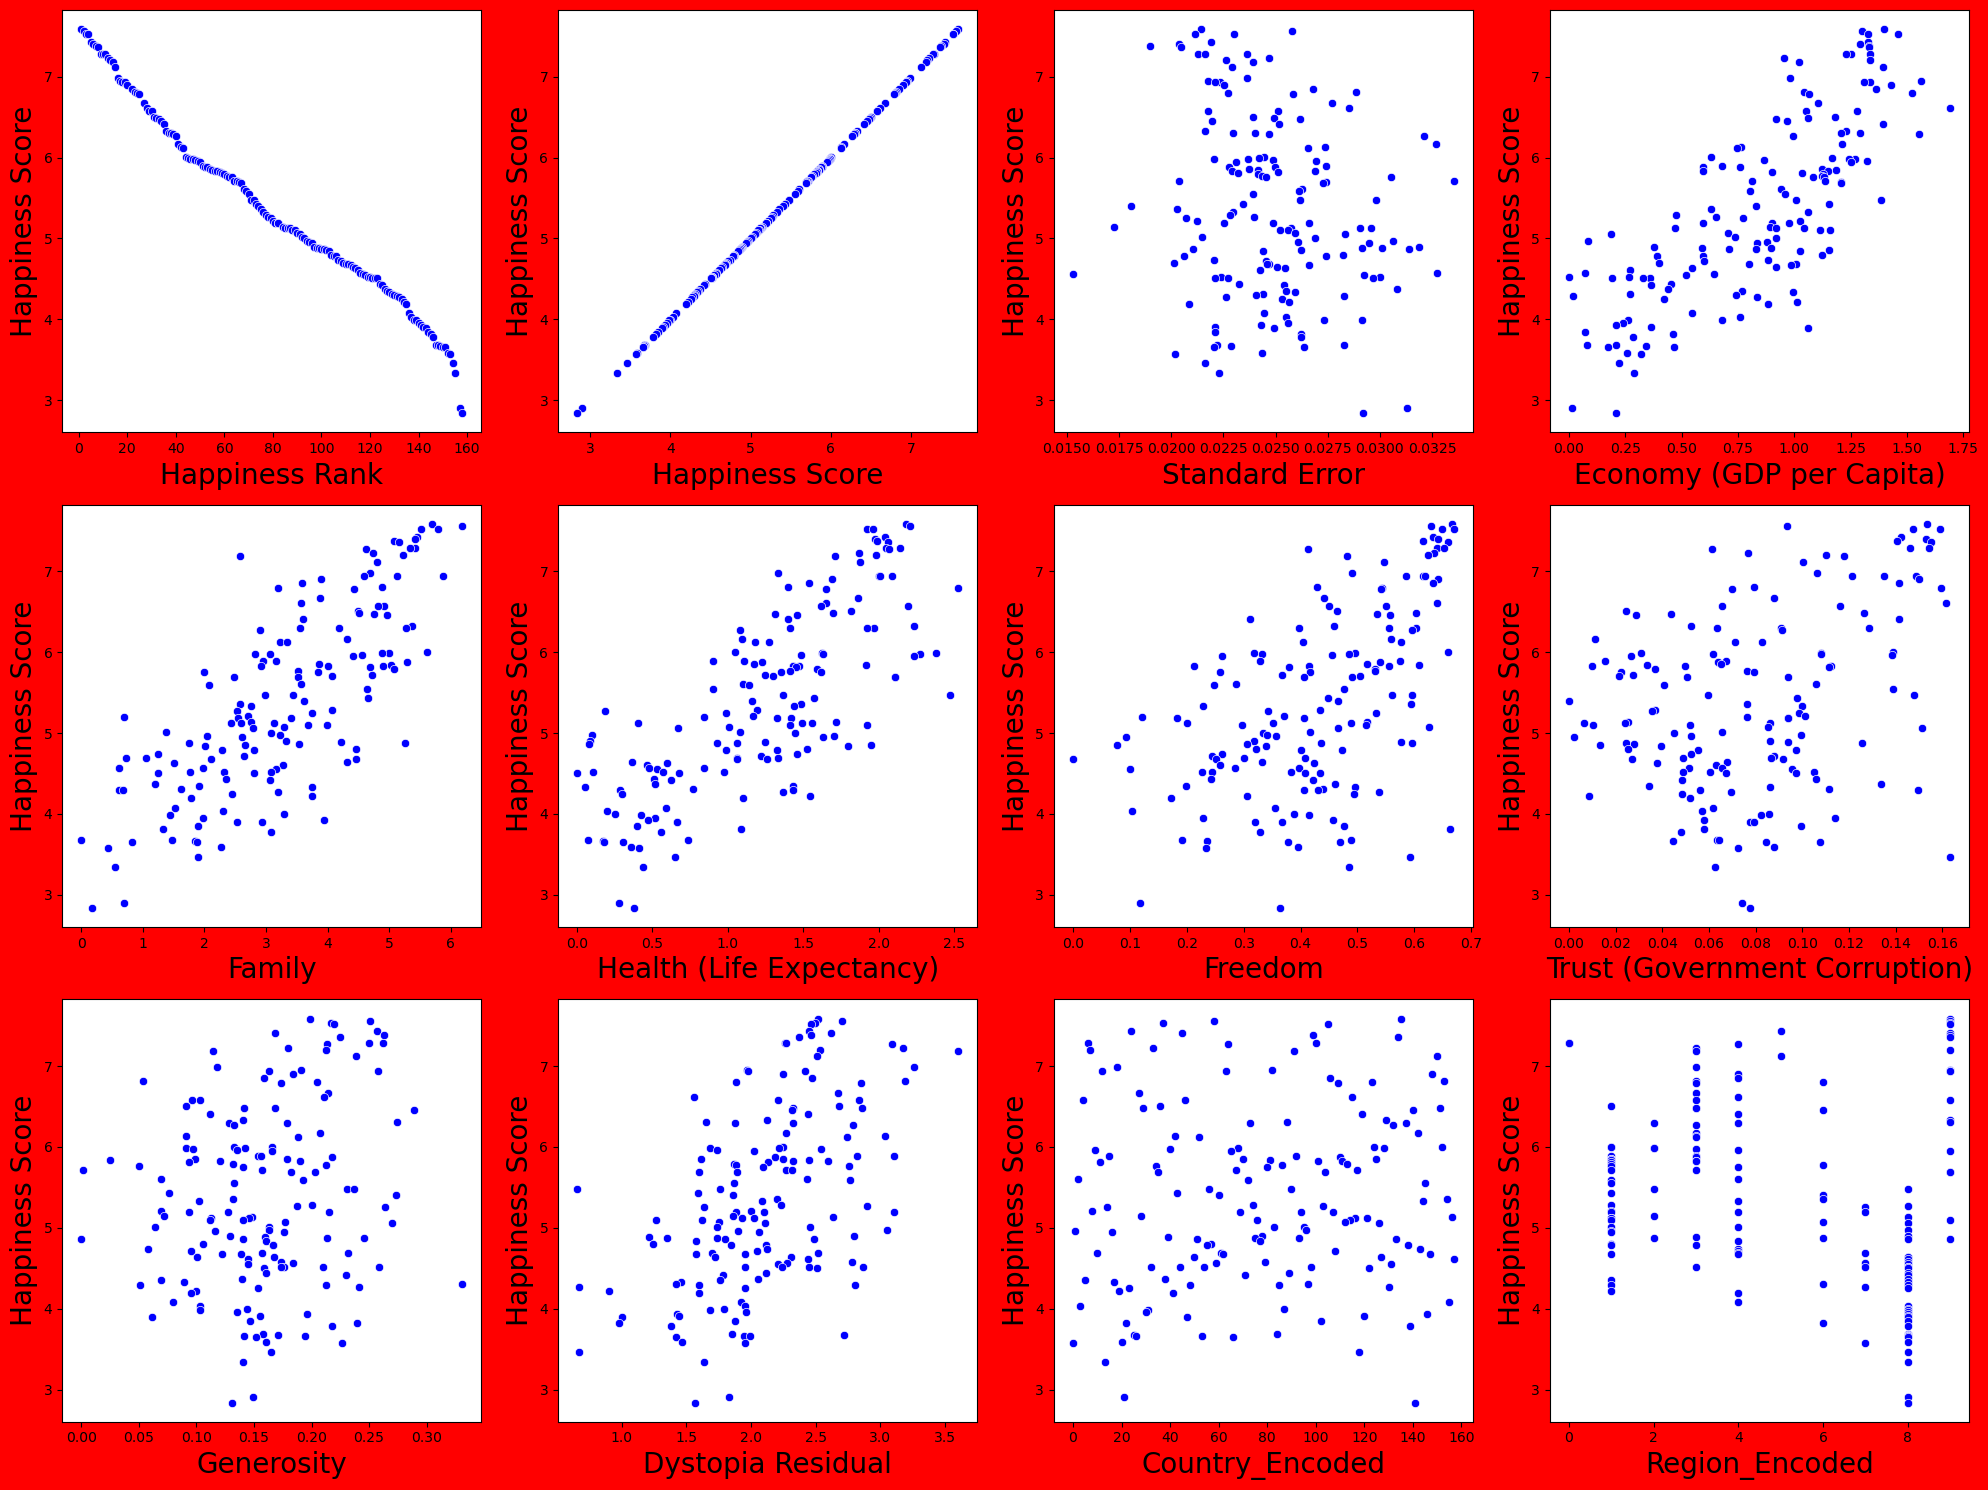

In [60]:

plt.figure(figsize=(20, 15), facecolor='red')

plotnumber = 1
for column in df_zscore: 
    if plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber) 
        sns.scatterplot(y='Happiness Score', x=column, data=df_zscore, color='blue')  
        plt.ylabel("Happiness Score", fontsize=20)
        plt.xlabel(column,fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()


In [61]:
# here i again plot scatter plot to check the scatteredness of the data but i observed there is no difference even after removing outliers 
# data is still Scattered.

In [62]:
# lets drop happiness rank column to handle multicoliniarity issue

x.drop('Happiness Rank',axis = 1,inplace=True)

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif['VIF features'] = x.columns
vif

VIF values                   VIF features
0    1.171646                 Standard Error
1    4.494800       Economy (GDP per Capita)
2    2.227618                         Family
3    4.046719       Health (Life Expectancy)
4    1.861479                        Freedom
5    1.375113  Trust (Government Corruption)
6    1.443048                     Generosity
7    1.062253              Dystopia Residual
8    1.042372                Country_Encoded
9    1.334180                 Region_Encoded

In [64]:
# so here after scaling the data and dropping the happiness rank column which had highest vif score now i can see vif values for all the other features is decent and hence There is no multicoliniarity any more

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.25,random_state=41)

In [66]:
y_train

156    2.905
146    3.681
103    4.800
152    3.575
14     7.119
       ...  
151    3.587
89     5.073
65     5.695
80     5.194
140    3.931
Name: Happiness Score, Length: 118, dtype: float64

In [67]:
x_train

Standard Error  Economy (GDP per Capita)    Family  \
156        1.926902                 -2.067566 -1.796803   
146       -0.742448                 -1.587429 -1.258481   
103        1.030146                  0.683856  0.811098   
152       -1.338909                 -1.309758 -1.970375   
14        -0.542081                  1.364644  1.057781   
..              ...                       ...       ...   
151       -0.114959                 -1.463301 -0.707255   
89         0.344018                 -0.350428  0.002761   
65         0.781282                  0.900657  0.158342   
80        -0.650508                 -0.623893 -1.799798   
140       -0.120707                 -1.580511  0.456269   

     Health (Life Expectancy)   Freedom  Trust (Government Corruption)  \
156                 -1.525700 -2.064472                      -0.151946   
146                 -0.807172 -1.576239                      -0.417236   
103                  0.449572 -0.715606                      -1.341383   
152                 -1.320450 -1.294643                      -0.196665   
14                   1.010370  0.781713                       0.484419   
..                        ...       ...                            ...   
151                 -1.406673 -0.224245                       0.177581   
89                  -0.372227  1.310354                       0.116034   
65                   1.380086  0.410445                       0.329635   
80                  -0.634214 -2.047696                      -0.100693   
140                 -1.220515  0.190760                      -0.544909   

     Generosity  Dystopia Residual  Country_Encoded  Region_Encoded  
156   -0.194829          -0.481985        -1.260695        0.965117  
146   -0.048379          -0.449400         0.120588        0.965117  
103   -0.904461          -1.555354        -0.471390       -1.380859  
152    1.077647          -0.266180        -1.721123        0.629977  
14     1.289441           0.745083         1.567647       -0.040302  
..          ...                ...              ...             ...  
151   -0.011617          -1.149044        -1.282620        0.965117  
89     0.263187          -0.625915         0.734492        0.294838  
65     0.357470          -0.906309         0.559091        1.300256  
80     0.897428           1.826970         0.624866        0.629977  
140    0.577828          -1.216605         1.479946        0.965117  

[118 rows x 10 columns]

In [115]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [116]:
lr.score(x_train,y_train)

0.9953064055452283

In [117]:
lr.score(x_test,y_test)

0.9923020466560545

In [118]:
# as its multiple linear regression i used adjested r2 only

In [119]:
y_pred = lr.predict(x_test)

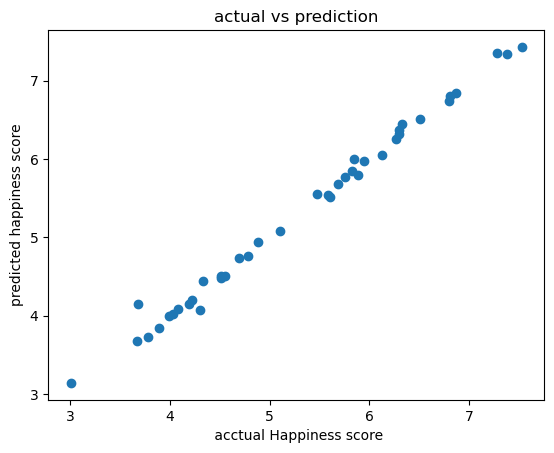

In [120]:
plt.scatter(y_test,y_pred)
plt.xlabel(' acctual Happiness score')
plt.ylabel('predicted happiness score')
plt.title('actual vs prediction')
plt.show()


In [121]:

#MAE
print ('mean_absolute_errror:',mean_absolute_error(y_test,y_pred))
#MSE
print ('mean_squared_error:',mean_squared_error(y_test,y_pred))
#RMSE
print('root_mean_squares_error:',np.sqrt(mean_squared_error(y_test,y_pred)))

mean_absolute_errror: 0.06269452372327432
mean_squared_error: 0.010553547626648844
root_mean_squares_error: 0.10273046104563556


In [110]:
#RandomForestClassifier
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [111]:
rfr.score(x_train,y_train)

0.9873632356713785

In [112]:
rfr.score(x_test,y_test)

0.8161367623536147

In [113]:
y_pred = rfr.predict(x_test)

In [114]:

#MAE
print ('mean_absolute_errror:',mean_absolute_error(y_test,y_pred))
#MSE
print ('mean_squared_error:',mean_squared_error(y_test,y_pred))
#RMSE
print('root_mean_squares_error:',np.sqrt(mean_squared_error(y_test,y_pred)))

mean_absolute_errror: 0.38259025000000024
mean_squared_error: 0.2520682249675003
root_mean_squares_error: 0.5020639650159134
